# **Flight Delay Prediction**

# **Importing necessary packages and loading the dataset**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('flights.csv')

C:\Users\0931\AppData\Local\Temp\ipykernel_6396\947759536.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('flights.csv')


In [3]:
#let's print the first 5 records of the dataset 
data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#let's print the last 5 records of the dataset 
data.tail()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819078,2015,12,31,4,B6,839,N534JB,JFK,BQN,2359,...,442.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


#### **Let's understand more about the data**

In [5]:
data.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [6]:
print('The shape of the dataset:')
data.shape

The shape of the dataset:


(5819079, 31)

In [7]:
data.dtypes

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE                 int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED                 int64
CANCELLED                int64
CANCELLATION_REASON     object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
dtype: object

**Here we saw that there are the data types like float, intiger and the objective data type as well in our dataset.**

In [8]:
#Let's get the information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [9]:
#Let's get the unique values in each and every column of our dataset
data.nunique()

YEAR                      1
MONTH                    12
DAY                      31
DAY_OF_WEEK               7
AIRLINE                  14
FLIGHT_NUMBER          6952
TAIL_NUMBER            4897
ORIGIN_AIRPORT          930
DESTINATION_AIRPORT     930
SCHEDULED_DEPARTURE    1321
DEPARTURE_TIME         1440
DEPARTURE_DELAY        1217
TAXI_OUT                184
WHEELS_OFF             1440
SCHEDULED_TIME          550
ELAPSED_TIME            712
AIR_TIME                675
DISTANCE               1363
WHEELS_ON              1440
TAXI_IN                 185
SCHEDULED_ARRIVAL      1435
ARRIVAL_TIME           1440
ARRIVAL_DELAY          1240
DIVERTED                  2
CANCELLED                 2
CANCELLATION_REASON       4
AIR_SYSTEM_DELAY        570
SECURITY_DELAY          154
AIRLINE_DELAY          1067
LATE_AIRCRAFT_DELAY     695
WEATHER_DELAY           632
dtype: int64

# **Exploratory Data Analysis**

In [10]:
#Let's check the null values in our data
data.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

c:\Program Files\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


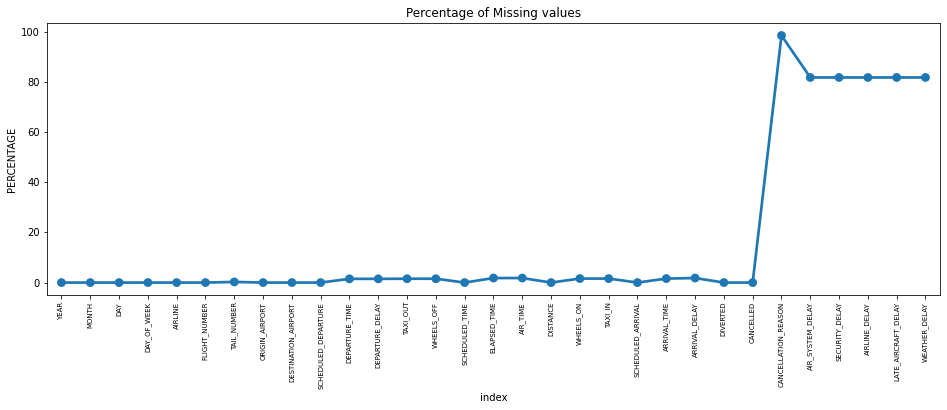

In [ ]:
#plot the graph to check wether there are any missing value present
missing = pd.DataFrame((data.isnull().sum())*100/data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

<AxesSubplot:>

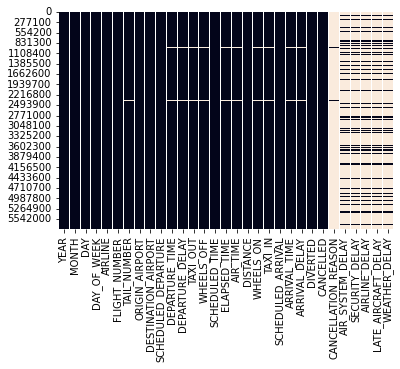

In [12]:
# Checking Null Value by plotting Heatmap
sns.heatmap(data.isnull(), cbar=False)

In [13]:
#Let's check the duplicated values 
data.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
5819074    False
5819075    False
5819076    False
5819077    False
5819078    False
Length: 5819079, dtype: bool

In [14]:
#Let's check the total no of duplicated values 
data.duplicated().sum()

0

In [15]:
data.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

[Text(0.5, 1.0, 'Number of cancellation by each and every airline ')]

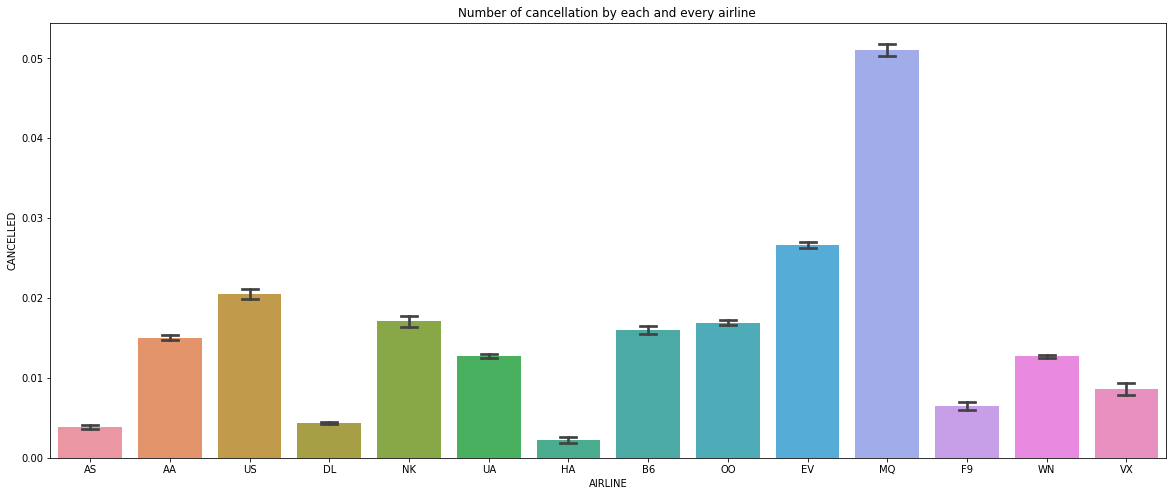

In [16]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=data,x='AIRLINE',y='CANCELLED',ax=ax,capsize=.2)
ax.set(title='Number of cancellation by each and every airline ')

<AxesSubplot:xlabel='AIRLINE', ylabel='count'>

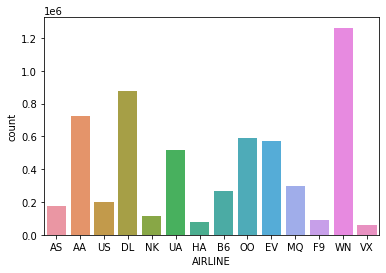

In [17]:
# Let's see the number of travel done by using each and every airline
sns.countplot(x=data.AIRLINE)

In [18]:
data.AIRLINE.value_counts()

WN    1261855
DL     875881
AA     725984
OO     588353
EV     571977
UA     515723
MQ     294632
B6     267048
US     198715
AS     172521
NK     117379
F9      90836
HA      76272
VX      61903
Name: AIRLINE, dtype: int64

In [19]:
data.AIRLINE.nunique()

14

[Text(0.5, 1.0, 'Count of number of flight cancelled monthwise by each airline ')]

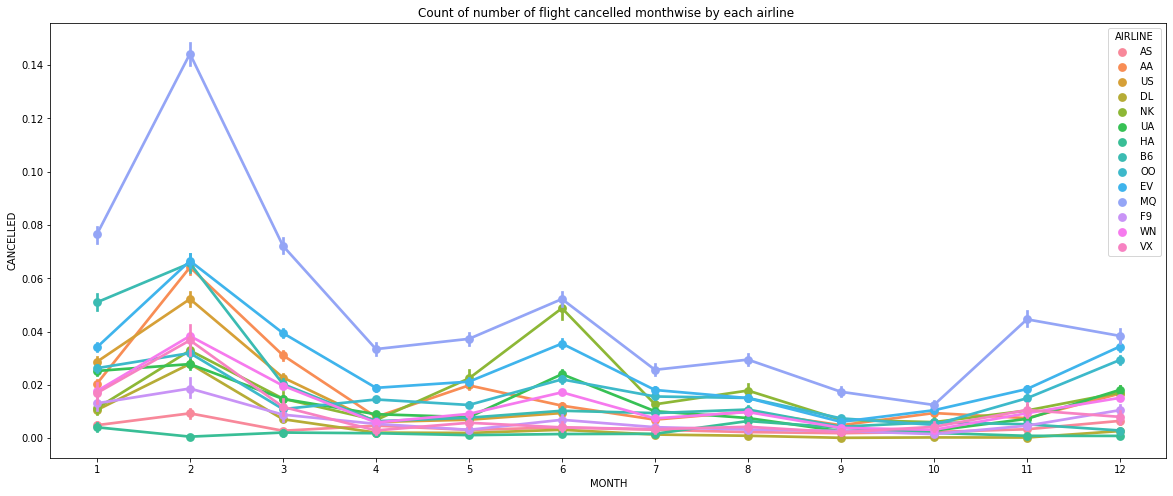

In [20]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=data,x='MONTH',y='CANCELLED',hue='AIRLINE',ax=ax)
ax.set(title='Count of number of flight cancelled monthwise by each airline ')

array([[<AxesSubplot:title={'center':'YEAR'}>,
        <AxesSubplot:title={'center':'MONTH'}>,
        <AxesSubplot:title={'center':'DAY'}>,
        <AxesSubplot:title={'center':'DAY_OF_WEEK'}>,
        <AxesSubplot:title={'center':'FLIGHT_NUMBER'}>],
       [<AxesSubplot:title={'center':'SCHEDULED_DEPARTURE'}>,
        <AxesSubplot:title={'center':'DEPARTURE_TIME'}>,
        <AxesSubplot:title={'center':'DEPARTURE_DELAY'}>,
        <AxesSubplot:title={'center':'TAXI_OUT'}>,
        <AxesSubplot:title={'center':'WHEELS_OFF'}>],
       [<AxesSubplot:title={'center':'SCHEDULED_TIME'}>,
        <AxesSubplot:title={'center':'ELAPSED_TIME'}>,
        <AxesSubplot:title={'center':'AIR_TIME'}>,
        <AxesSubplot:title={'center':'DISTANCE'}>,
        <AxesSubplot:title={'center':'WHEELS_ON'}>],
       [<AxesSubplot:title={'center':'TAXI_IN'}>,
        <AxesSubplot:title={'center':'SCHEDULED_ARRIVAL'}>,
        <AxesSubplot:title={'center':'ARRIVAL_TIME'}>,
        <AxesSubplot:title={'cente

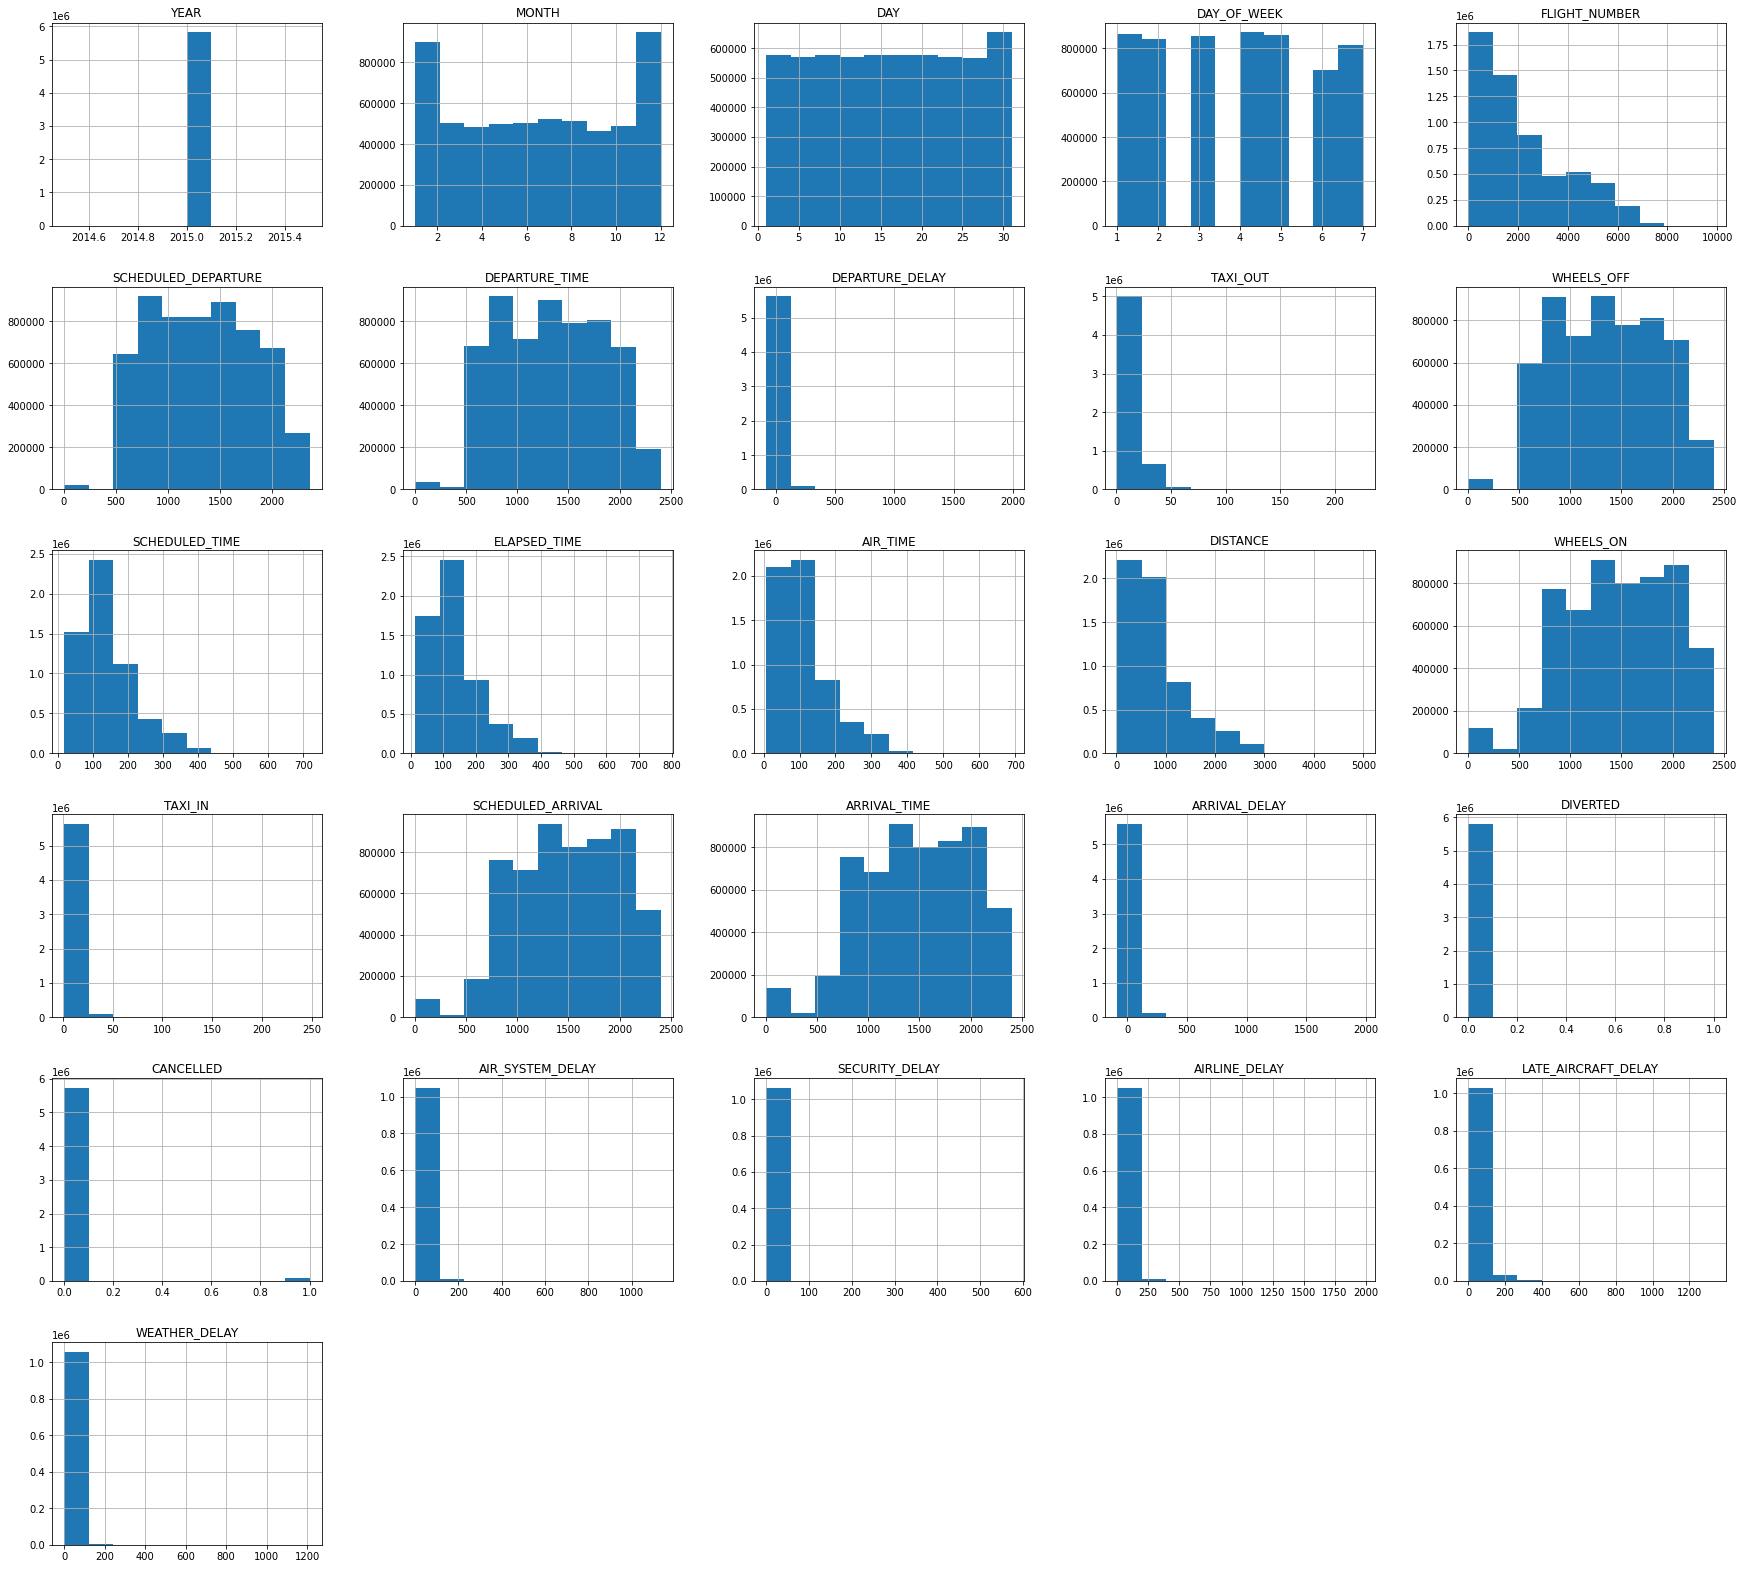

In [21]:
data.hist(figsize = (30,28)) #shows graphically the value counts of each column 

c:\Program Files\Python36\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


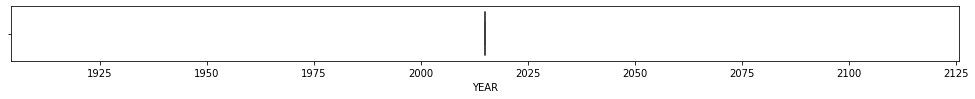

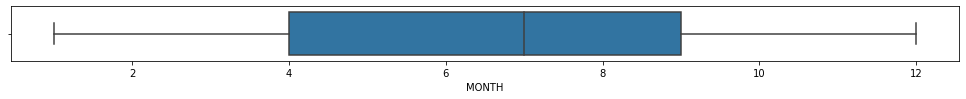

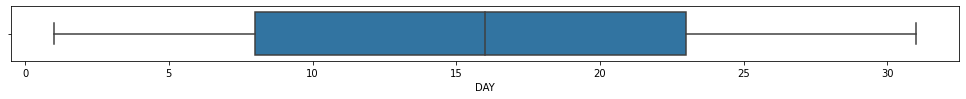

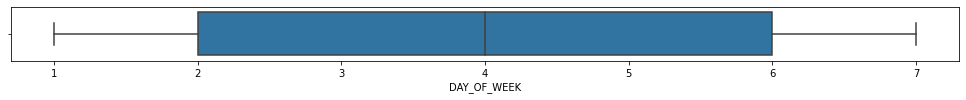

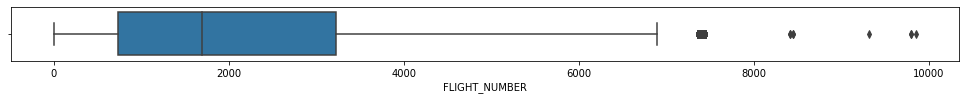

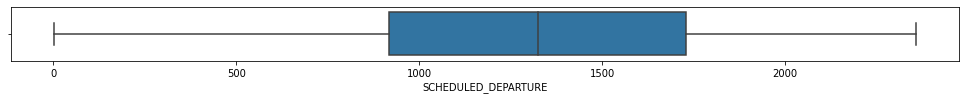

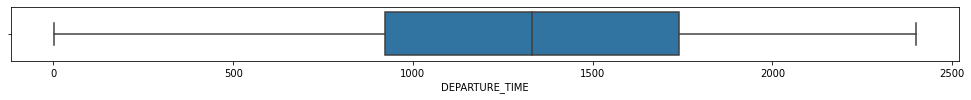

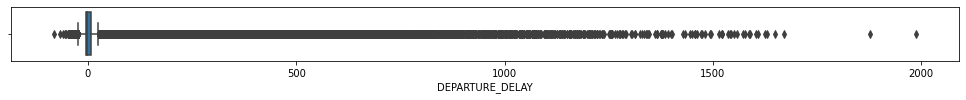

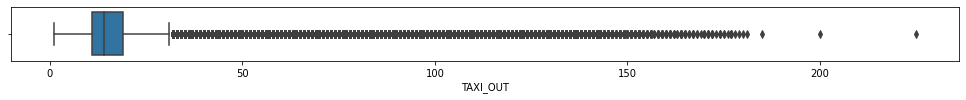

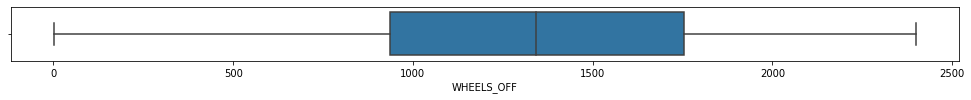

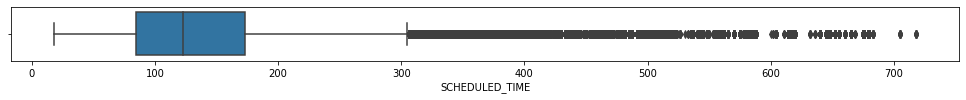

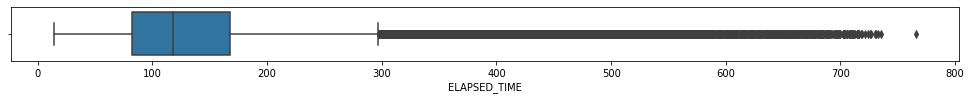

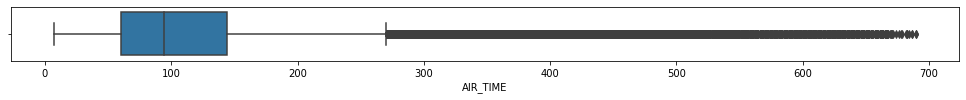

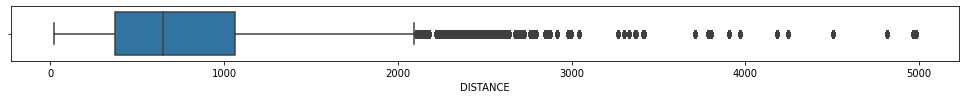

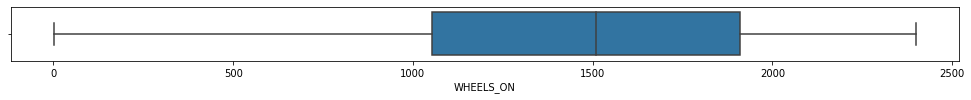

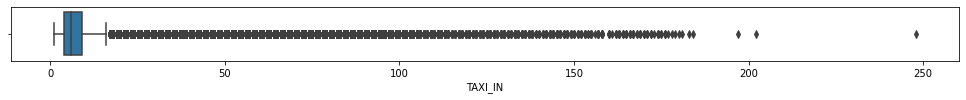

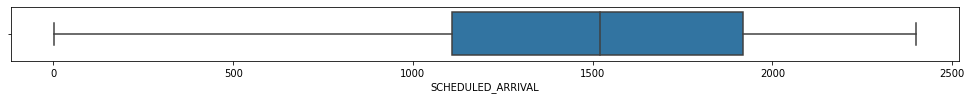

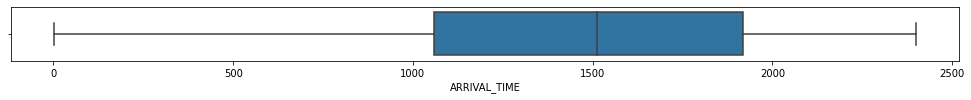

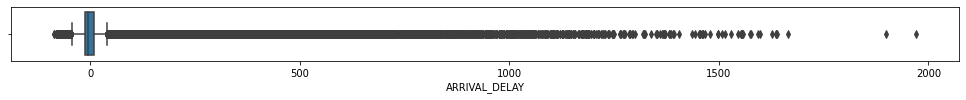

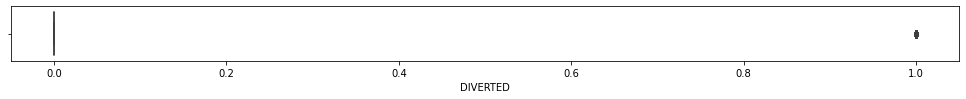

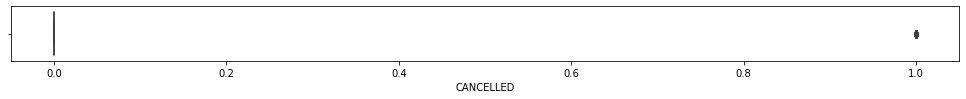

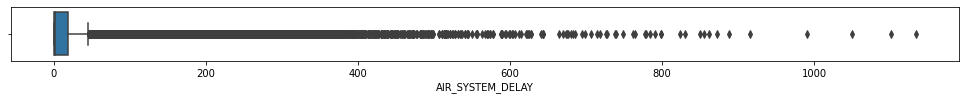

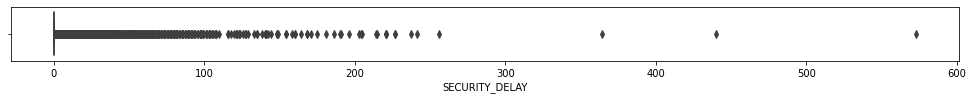

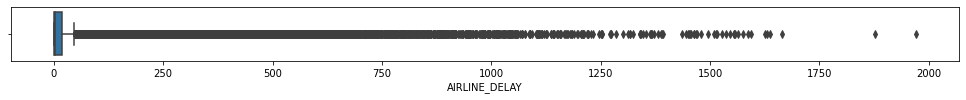

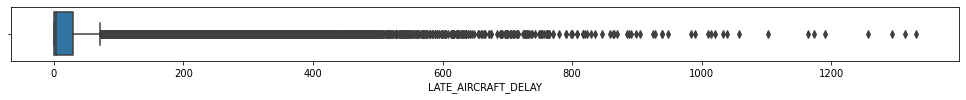

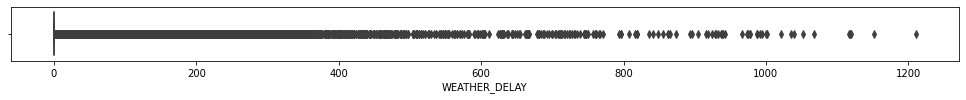

In [22]:
#Printing boxplot for each numerical column present in the data set
df1=data.select_dtypes(exclude=['object','bool'])
for column in df1:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df1, x=column)
plt.show()

c:\Program Files\Python36\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


<Figure size 1224x72 with 0 Axes>

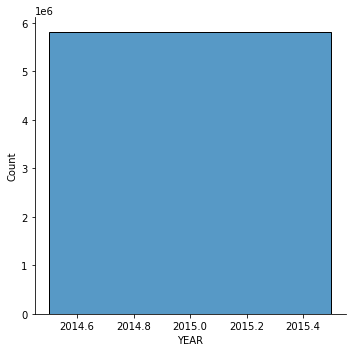

<Figure size 1224x72 with 0 Axes>

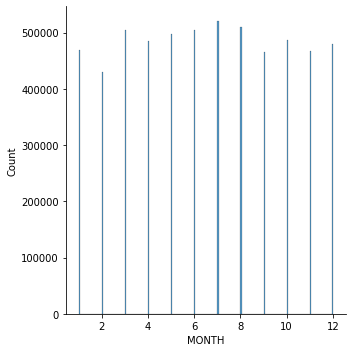

<Figure size 1224x72 with 0 Axes>

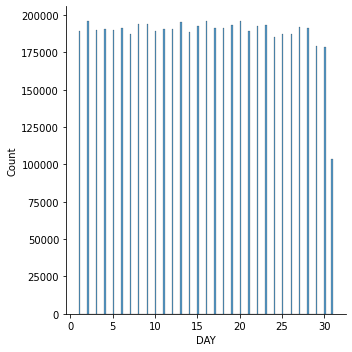

<Figure size 1224x72 with 0 Axes>

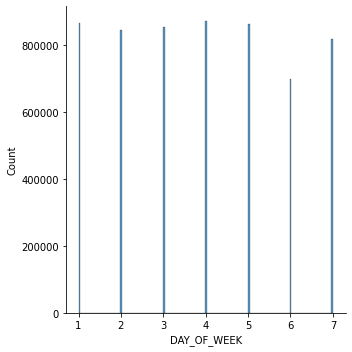

<Figure size 1224x72 with 0 Axes>

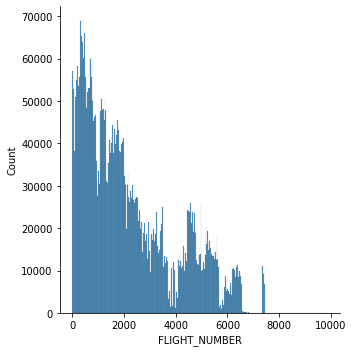

<Figure size 1224x72 with 0 Axes>

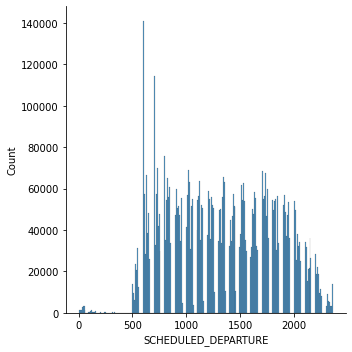

<Figure size 1224x72 with 0 Axes>

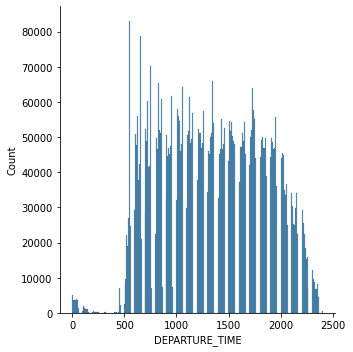

<Figure size 1224x72 with 0 Axes>

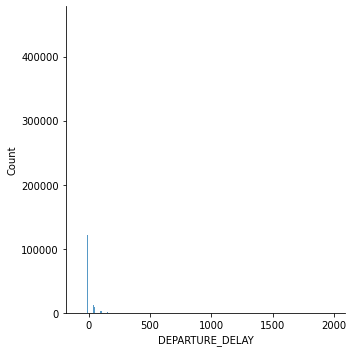

<Figure size 1224x72 with 0 Axes>

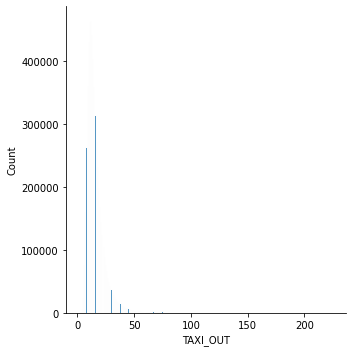

<Figure size 1224x72 with 0 Axes>

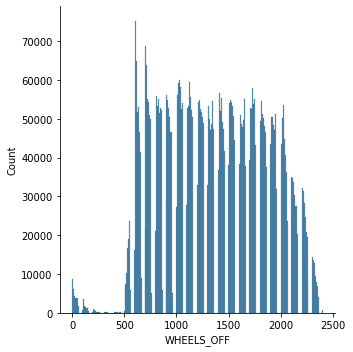

<Figure size 1224x72 with 0 Axes>

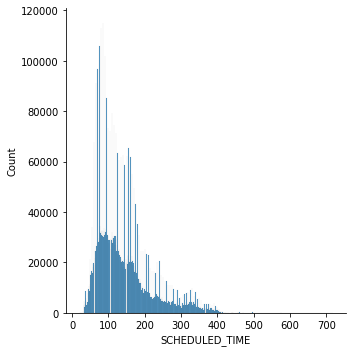

<Figure size 1224x72 with 0 Axes>

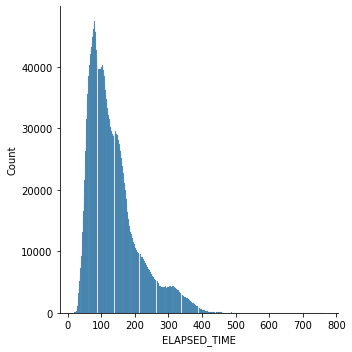

<Figure size 1224x72 with 0 Axes>

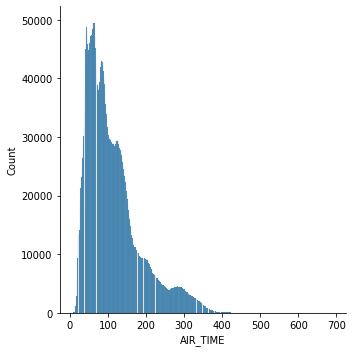

<Figure size 1224x72 with 0 Axes>

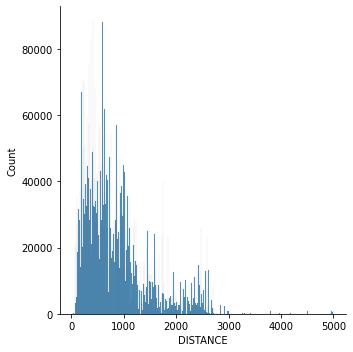

<Figure size 1224x72 with 0 Axes>

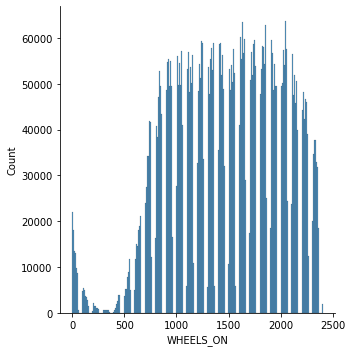

<Figure size 1224x72 with 0 Axes>

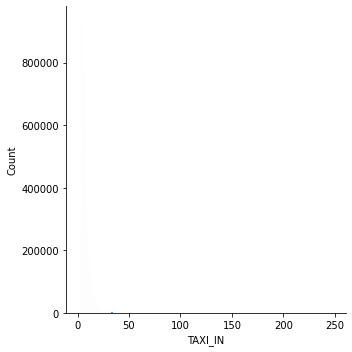

<Figure size 1224x72 with 0 Axes>

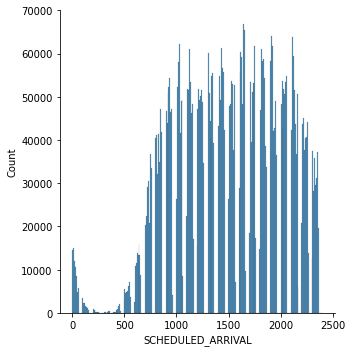

<Figure size 1224x72 with 0 Axes>

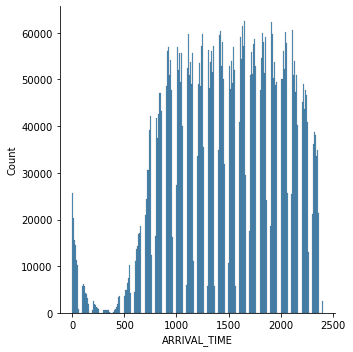

<Figure size 1224x72 with 0 Axes>

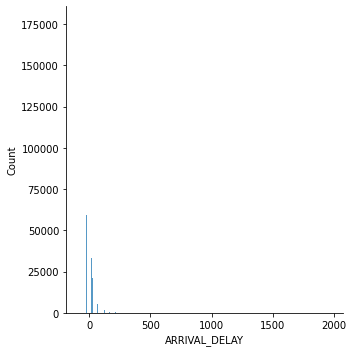

<Figure size 1224x72 with 0 Axes>

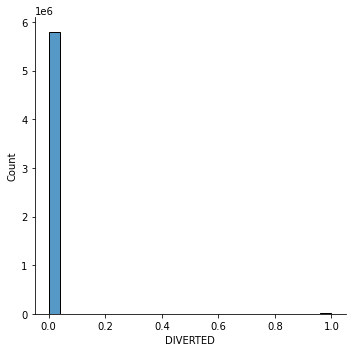

<Figure size 1224x72 with 0 Axes>

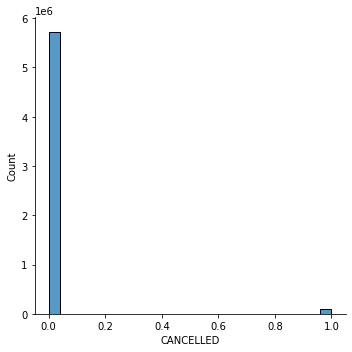

<Figure size 1224x72 with 0 Axes>

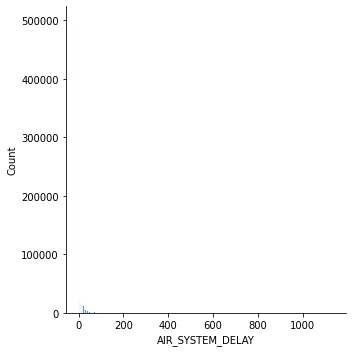

<Figure size 1224x72 with 0 Axes>

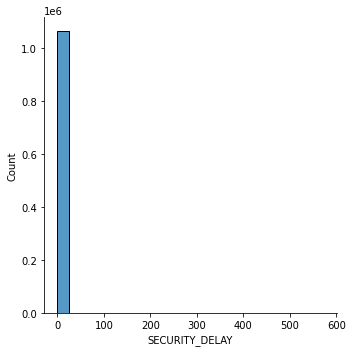

<Figure size 1224x72 with 0 Axes>

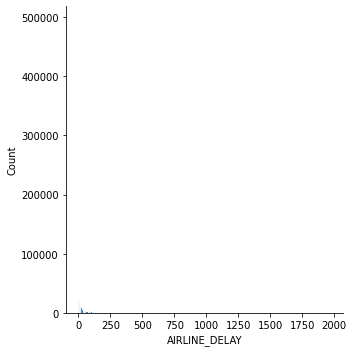

<Figure size 1224x72 with 0 Axes>

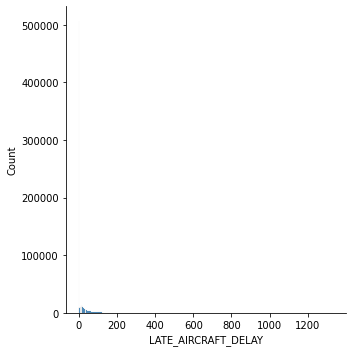

<Figure size 1224x72 with 0 Axes>

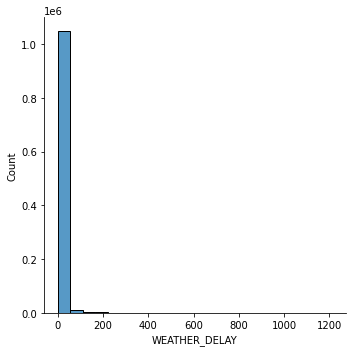

In [23]:
#Printing displot for each numerical column present in the data set
df1=data.select_dtypes(exclude=['object','bool'])
for column in df1:
        plt.figure(figsize=(17,1))
        sns.displot(data=df1, x=column)
plt.show()

<AxesSubplot:>

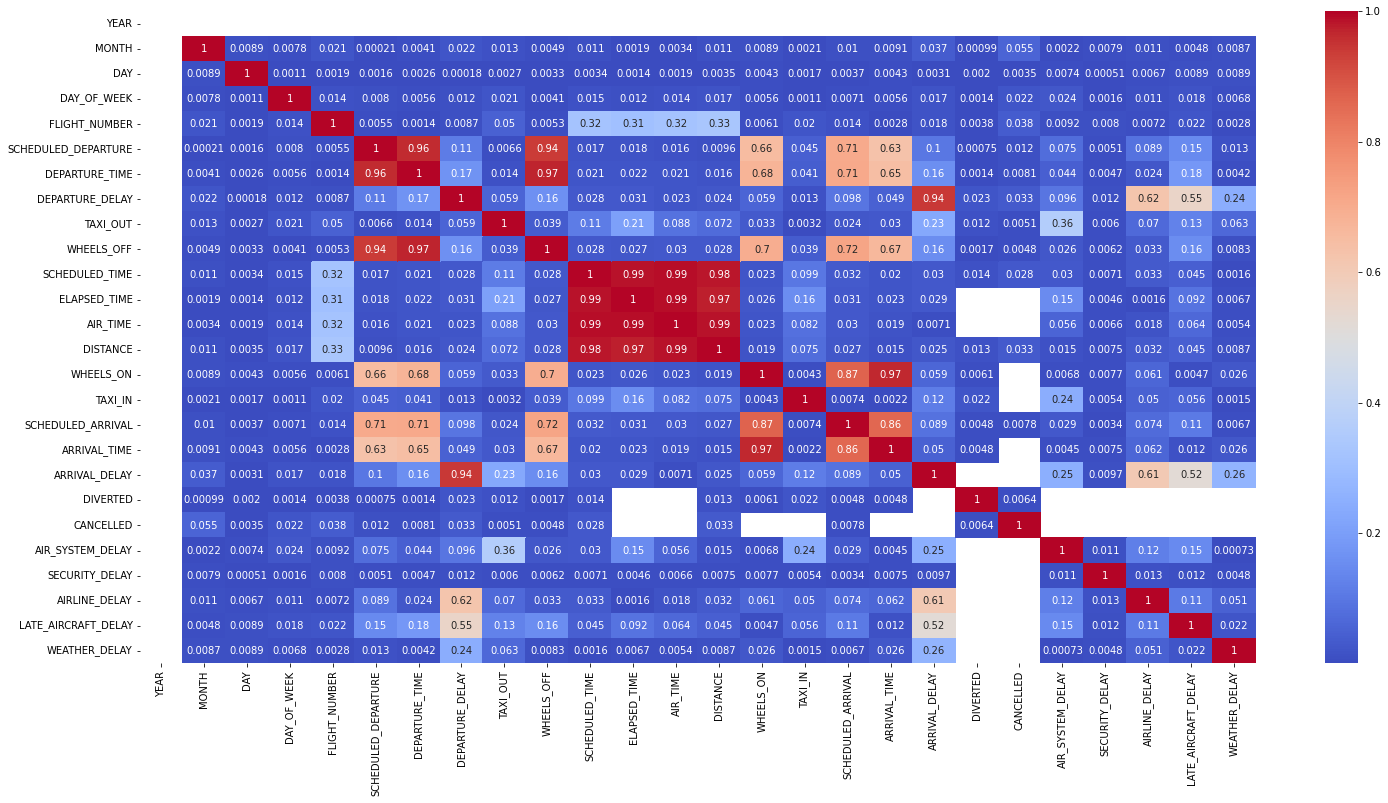

In [24]:
## plot the Correlation matrix
plt.figure(figsize=(25,12))
correlation=data.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

[Text(0.5, 1.0, 'ARRIVAL_DELAY by each and every airline ')]

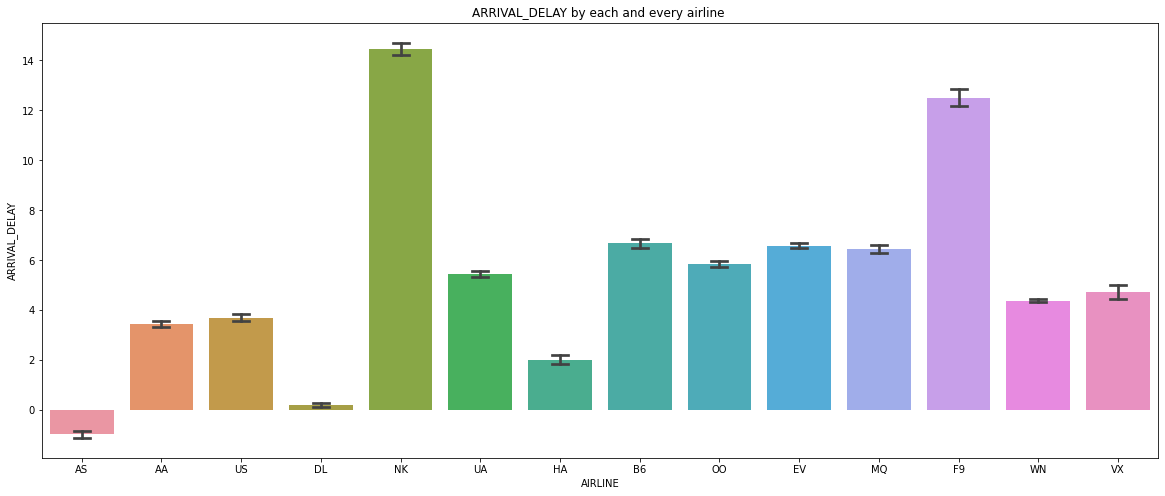

In [25]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=data,x='AIRLINE',y='ARRIVAL_DELAY',ax=ax,capsize=.2)
ax.set(title='ARRIVAL_DELAY by each and every airline ')

[Text(0.5, 1.0, 'DEPARTURE_DELAY by each and every airline ')]

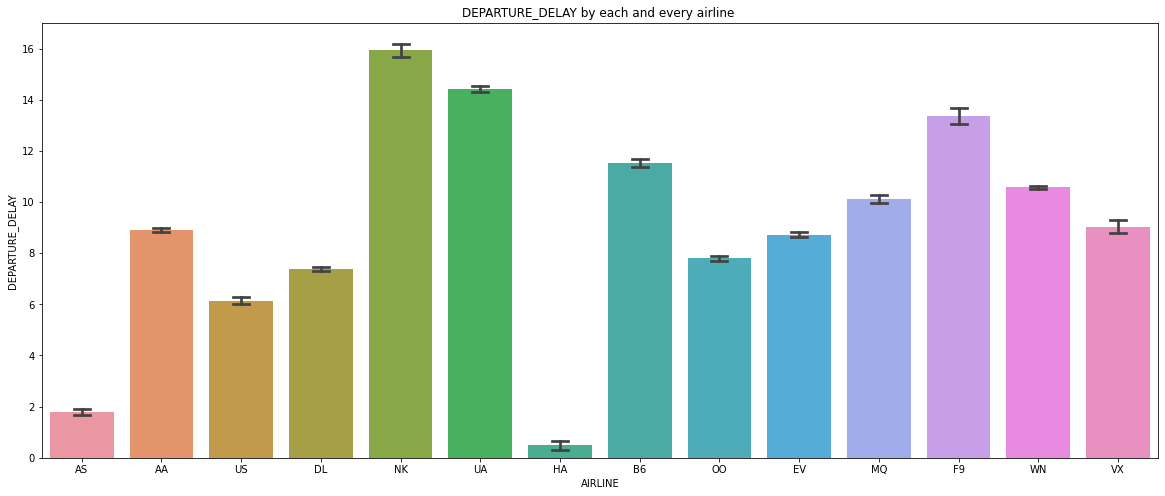

In [26]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=data,x='AIRLINE',y='DEPARTURE_DELAY',ax=ax,capsize=.2)
ax.set(title='DEPARTURE_DELAY by each and every airline ')

<AxesSubplot:xlabel='FLIGHT_NUMBER', ylabel='count'>

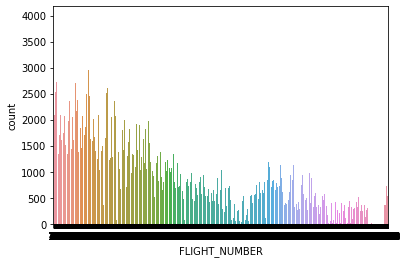

In [27]:
# Let's see the number of flight
sns.countplot(x=data.FLIGHT_NUMBER)

In [28]:
data.FLIGHT_NUMBER.value_counts()

469     3975
327     3554
326     3513
188     3386
403     3370
        ... 
6690       1
6689       1
6850       1
8410       1
6881       1
Name: FLIGHT_NUMBER, Length: 6952, dtype: int64

In [29]:
data.FLIGHT_NUMBER.nunique()

6952

[Text(0.5, 1.0, 'DIVERTED FLIGHTS by each and every airline ')]

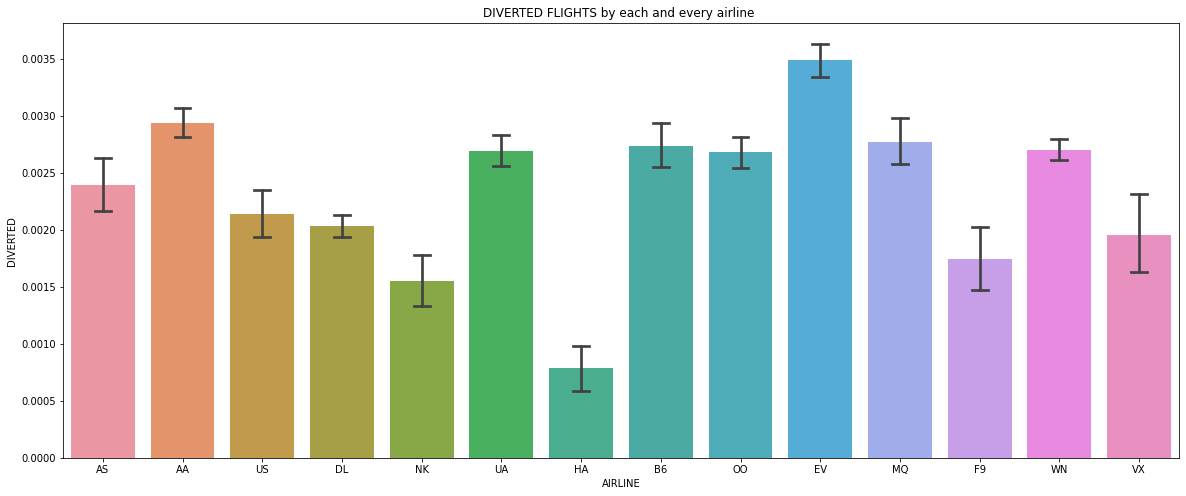

In [30]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=data,x='AIRLINE',y='DIVERTED',ax=ax,capsize=.2)
ax.set(title='DIVERTED FLIGHTS by each and every airline ')

<AxesSubplot:xlabel='WHEELS_OFF'>

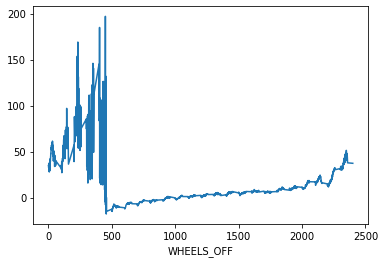

In [31]:
#print the plot to analyze the relationship between "ARRIVAL_DELAY" and "WHEELS_OFF" 
data.groupby('WHEELS_OFF').mean()['ARRIVAL_DELAY'].plot()

<AxesSubplot:xlabel='WHEELS_OFF'>

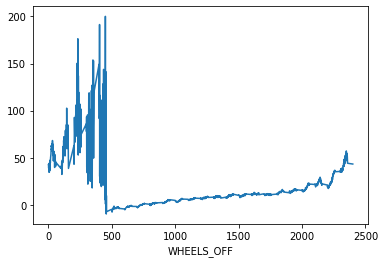

In [32]:
#print the plot to analyze the relationship between "DEPARTURE_DELAY" and "WHEELS_OFF" 
data.groupby('WHEELS_OFF').mean()['DEPARTURE_DELAY'].plot()

In [33]:
data.ORIGIN_AIRPORT.nunique()

930

In [34]:
data.DESTINATION_AIRPORT.nunique()

930

In [35]:
data.ORIGIN_AIRPORT.value_counts()

ATL      346836
ORD      285884
DFW      239551
DEN      196055
LAX      194673
          ...  
13502         1
15497         1
11503         1
12265         1
14222         1
Name: ORIGIN_AIRPORT, Length: 930, dtype: int64

<AxesSubplot:xlabel='ORIGIN_AIRPORT', ylabel='count'>

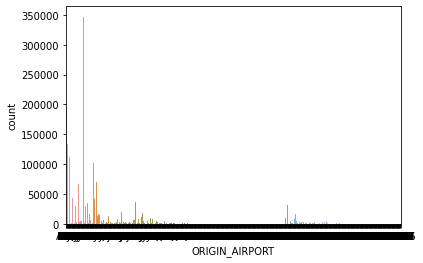

In [36]:
# Let's see the number of travel done by using each and every airline
sns.countplot(x=data.ORIGIN_AIRPORT)

<AxesSubplot:>

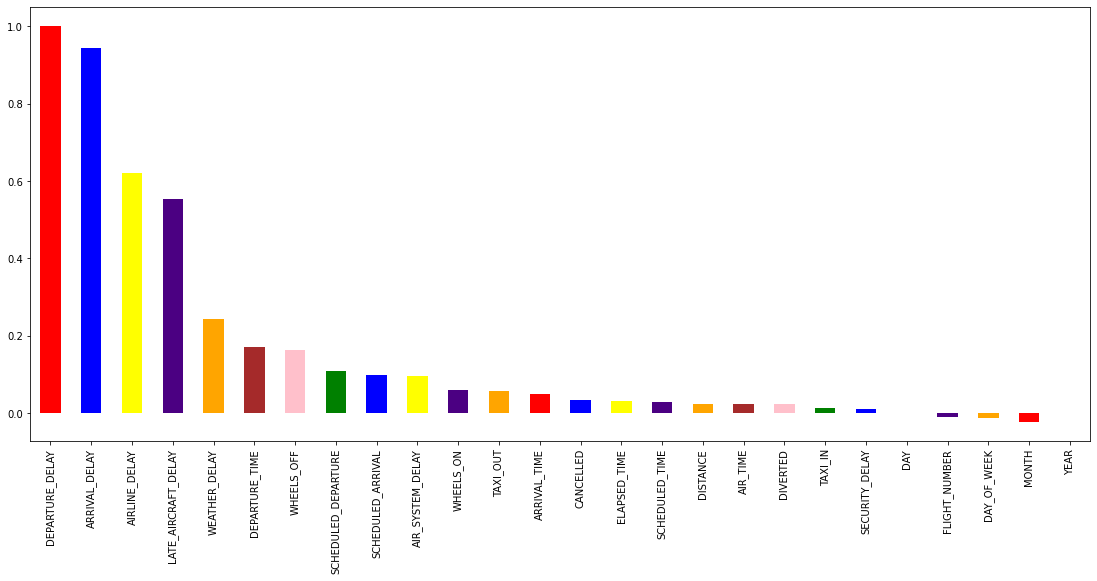

In [37]:
# visualization using correlation plot
plt.figure(figsize=(19,8))
data.corr()['DEPARTURE_DELAY'].sort_values(ascending = False).plot(kind='bar',color = ['red','blue','yellow','indigo','orange','brown','pink','green','blue','yellow','indigo','orange'])

<AxesSubplot:>

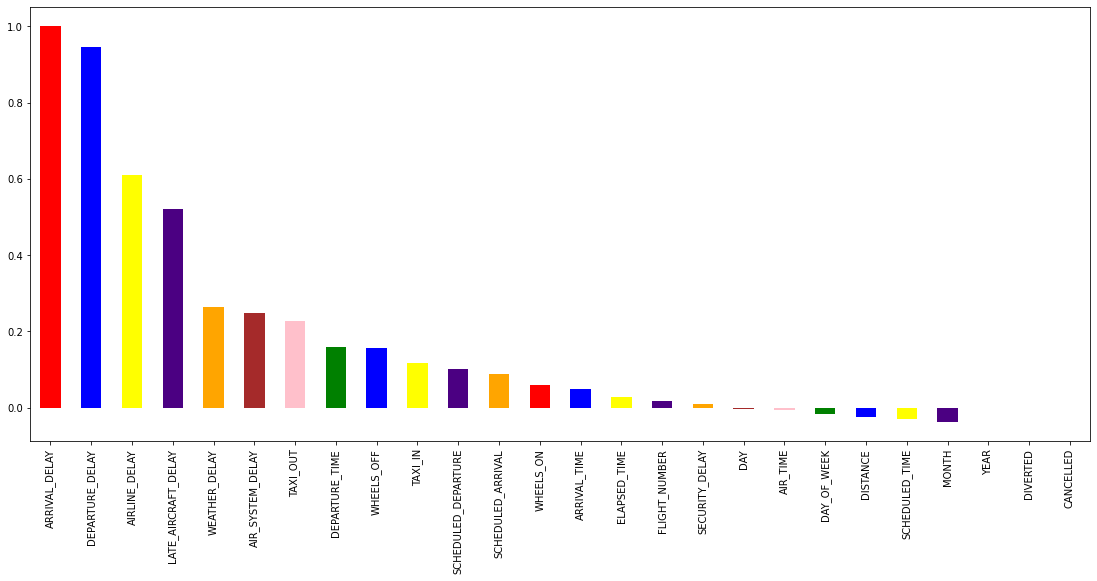

In [38]:
# visualization using correlation plot
plt.figure(figsize=(19,8))
data.corr()['ARRIVAL_DELAY'].sort_values(ascending = False).plot(kind='bar',color = ['red','blue','yellow','indigo','orange','brown','pink','green','blue','yellow','indigo','orange'])

## **Preprocessing**

In [11]:
data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#total missing data
train_total = data.isnull().sum()
train_percent= ((data.isnull().sum()/data.shape[0])*100)

data_missing= pd.DataFrame({'train total':train_total, 'train percent': train_percent})
data_missing.sort_values(by='train total', ascending=False).head(10)

,train total,train percent
CANCELLATION_REASON,5729195,98.455357
WEATHER_DELAY,4755640,81.724960
LATE_AIRCRAFT_DELAY,4755640,81.724960
AIRLINE_DELAY,4755640,81.724960
SECURITY_DELAY,4755640,81.724960
AIR_SYSTEM_DELAY,4755640,81.724960
AIR_TIME,105071,1.805629
ARRIVAL_DELAY,105071,1.805629
ELAPSED_TIME,105071,1.805629
WHEELS_ON,92513,1.589822


In [13]:
## Here we can See more than 80% data is missing in some columns 
## so we droping that columns

data.drop(['CANCELLATION_REASON', 'WEATHER_DELAY', 'LATE_AIRCRAFT_DELAY','AIRLINE_DELAY', 'SECURITY_DELAY', 'AIR_SYSTEM_DELAY'], axis=1, inplace=True)

In [14]:
data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0


In [15]:
# Drop rows with any null values
data.dropna(inplace=True)

In [16]:
## Checking the datashape
data.shape

(5714008, 25)

In [17]:
# converting the object data type to numerical data type by using the LabelEncoder 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [18]:
### Extract the object datatype columns from our dataset
l = []
for i in data.columns:
    if data[i].dtypes=='object':
        l.append(i)
        
print(l)

['AIRLINE', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']


In [19]:
 # converting mixed (object) datatypes to string
for x in data.columns:
        if str(data[x].dtype) == 'object':
            data[x] = data[x].astype('str')
data.reset_index(drop=True, inplace=True)

In [20]:
data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0


In [21]:
### Converting categorical Data into Numerical data using LabelEncoding
for i in data.columns:
    if data[i].dtypes=='object':
        data[i]= le.fit_transform(data[i])

In [22]:
## After converting all data into numeric checking the information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5714008 entries, 0 to 5714007
Data columns (total 25 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              int32  
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          int32  
 7   ORIGIN_AIRPORT       int32  
 8   DESTINATION_AIRPORT  int32  
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [23]:
### Again Checking is their any Categorical data is present or not
l = []
for i in data.columns:
    if data[i].dtypes=='object':
        l.append(i)
        
print(l)

[]


**There is no categorical or Pbject datatype columns is present**

In [24]:
data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
0,2015,1,1,4,1,98,1622,323,584,5,...,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0
1,2015,1,1,4,0,2336,1556,482,542,10,...,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0
2,2015,1,1,4,11,840,421,584,373,20,...,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0
3,2015,1,1,4,0,258,1516,482,510,20,...,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0
4,2015,1,1,4,1,135,2131,583,324,25,...,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0


In [25]:
data.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED'],
      dtype='object')

**Here we can See the dataset is Clean**

**Here we can write the code for take the maple data from our dataset**

In [26]:
# Sample a fraction of the data (e.g., 10%)
df = data.sample(frac=0.1, random_state=1)

In [27]:
# Save the sampled data to a new CSV file
df.to_csv('sampled_data.csv', index=False)

In [28]:
## Here we check the shape of dataset
df.shape

(571401, 25)

# **Splitting the data into Training and Testing**

In [29]:
x = df.drop([ 'ARRIVAL_DELAY', 'DEPARTURE_DELAY' ], axis=1)
y1 = df['ARRIVAL_DELAY']
y2 = df['DEPARTURE_DELAY']

In [30]:
x.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,DIVERTED,CANCELLED
172117,2015,1,12,1,13,4200,3542,589,575,1335,...,75.0,74.0,64.0,417,1455.0,3.0,1450,1458.0,0,0
5610623,2015,12,24,4,8,824,2031,326,358,1730,...,103.0,88.0,71.0,577,2058.0,8.0,1913,2106.0,0,0
652554,2015,2,14,6,0,1613,1387,509,592,1225,...,153.0,160.0,124.0,1045,1544.0,17.0,1558,1601.0,0,0
5261033,2015,12,2,3,0,460,3818,567,546,620,...,107.0,99.0,79.0,601,852.0,3.0,907,855.0,0,0
1229441,2015,3,24,2,13,1790,3351,498,502,800,...,80.0,76.0,60.0,405,911.0,6.0,920,917.0,0,0


In [31]:
y1.head()

172117       8.0
5610623    113.0
652554       3.0
5261033    -12.0
1229441     -3.0
Name: ARRIVAL_DELAY, dtype: float64

In [32]:
y2.head()

172117       9.0
5610623    128.0
652554      -4.0
5261033     -4.0
1229441      1.0
Name: DEPARTURE_DELAY, dtype: float64

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y1_train, y1_test = train_test_split(x , y1, test_size=0.4, random_state=1)

In [34]:
x_train.shape, x_test.shape, y1_train.shape, y1_test.shape

((342840, 23), (228561, 23), (342840,), (228561,))

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y2_train, y2_test = train_test_split(x , y2, test_size=0.4, random_state=1)

In [36]:
x_train.shape, x_test.shape, y2_train.shape, y2_test.shape

((342840, 23), (228561, 23), (342840,), (228561,))

# **Model Training**

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

**Random Forest Arrival Delayed**

In [31]:
rf_arr = RandomForestRegressor()
rf_arr.fit(x_train,y1_train)

pred_rf = rf_arr.predict(x_train)
rf_arr_r2 = r2_score(y1_train, pred_rf)
rf_arr_ma = mean_absolute_error(y1_train, pred_rf)
rf_arr_sq = mean_squared_error(y1_train, pred_rf)

print(f"accuracy = {rf_arr_r2}")
print(f"MAE = {rf_arr_ma}")
print(f"MSE = {rf_arr_sq}")

accuracy = 0.9927057318198297
MAE = 0.5768753937696884
MSE = 11.56500879710652


In [32]:
pred_rf = rf_arr.predict(x_test)
rf_arr_r2 = r2_score(y1_test, pred_rf)
rf_arr_ma = mean_absolute_error(y1_test, pred_rf)
rf_arr_sq = mean_squared_error(y1_test, pred_rf)

print(f"accuracy = {rf_arr_r2}")
print(f"MAE = {rf_arr_ma}")
print(f"MSE = {rf_arr_sq}")

accuracy = 0.9490781360184313
MAE = 1.472097076929135
MSE = 76.55457511473959


**Random Forest departure Delayed**

In [33]:
rf_dep = RandomForestRegressor()
rf_dep.fit(x_train,y2_train)

pred_rf = rf_dep.predict(x_train)
rf_dep_r2 = r2_score(y2_train, pred_rf)
rf_dep_ma = mean_absolute_error(y2_train, pred_rf)
rf_dep_sq = mean_squared_error(y2_train, pred_rf)

print(f"accuracy = {rf_dep_r2}")
print(f"MAE = {rf_dep_ma}")
print(f"MSE = {rf_dep_sq}")

accuracy = 0.9918871119994944
MAE = 0.9970052210943883
MSE = 11.374350440730371


In [34]:
pred_rf = rf_dep.predict(x_test)
rf_dep_r2 = r2_score(y2_test, pred_rf)
rf_dep_ma = mean_absolute_error(y2_test, pred_rf)
rf_dep_sq = mean_squared_error(y2_test, pred_rf)

print(f"accuracy = {rf_dep_r2}")
print(f"MAE = {rf_dep_ma}")
print(f"MSE = {rf_dep_sq}")

accuracy = 0.9435298622497891
MAE = 2.6548713035032234
MSE = 75.12463391742249


**Decision Tree  Arrival Delayed**

In [98]:
dt_arr = DecisionTreeRegressor()
dt_arr.fit(x_train,y1_train)
y_pred = dt_arr.predict(x_train)
acc_dt_arr = r2_score(y1_train, y_pred)
dt_arr_ma = mean_absolute_error(y1_train, y_pred)
dt_arr_sq = mean_squared_error(y1_train, y_pred)

print(f"accuracy = {acc_dt_arr}")
print(f"MAE = {dt_arr_ma}")
print(f"MSE = {dt_arr_sq}")

accuracy = 1.0
MAE = 0.0
MSE = 0.0


In [99]:
y_pred = dt_arr.predict(x_test)
acc_dt_arr = r2_score(y1_test, y_pred)
dt_arr_ma = mean_absolute_error(y1_test, y_pred)
dt_arr_sq = mean_squared_error(y1_test, y_pred)

print(f"accuracy = {acc_dt_arr}")
print(f"MAE = {dt_arr_ma}")
print(f"MSE = {dt_arr_sq}")

accuracy = 0.882418092761111
MAE = 2.7366436093646773
MSE = 176.76951010889871


**Decision Tree  departure Delayed**

In [100]:
dt_dep = DecisionTreeRegressor()
dt_dep.fit(x_train,y2_train)
y_pred = dt_dep.predict(x_train)
acc_dt_dep = r2_score(y2_train, y_pred)
dt_dep_ma = mean_absolute_error(y2_train, y_pred)
dt_dep_sq = mean_squared_error(y2_train, y_pred)

print(f"accuracy = {acc_dt_dep}")
print(f"MAE = {dt_dep_ma}")
print(f"MSE = {dt_dep_sq}")

accuracy = 1.0
MAE = 0.0
MSE = 0.0


In [101]:
y_pred = dt_dep.predict(x_test)
acc_dt_dep = r2_score(y2_test, y_pred)
dt_dep_ma = mean_absolute_error(y2_test, y_pred)
dt_dep_sq = mean_squared_error(y2_test, y_pred)

print(f"accuracy = {acc_dt_dep}")
print(f"MAE = {dt_dep_ma}")
print(f"MSE = {dt_dep_sq}")

accuracy = 0.8864015512290429
MAE = 3.8477518036760427
MSE = 151.12486382191187


**Bayesian Ridge Arrival Delayed**

In [39]:
br_arr = BayesianRidge()
br_arr.fit(x_train,y1_train)
y_pred = br_arr.predict(x_train)
acc_br_arr = r2_score(y1_train, y_pred)
br_arr_ma = mean_absolute_error(y1_train, y_pred)
br_arr_sq = mean_squared_error(y1_train, y_pred)

print(f"accuracy = {acc_br_arr}")
print(f"MAE = {br_arr_ma}")
print(f"MSE = {br_arr_sq}")

accuracy = 0.19409361996087637
MAE = 16.710071883914587
MSE = 1277.7586653770516


In [40]:
y_pred = br_arr.predict(x_test)
acc_br_arr = r2_score(y1_test, y_pred)
br_arr_ma = mean_absolute_error(y1_test, y_pred)
br_arr_sq = mean_squared_error(y1_test, y_pred)

print(f"accuracy = {acc_br_arr}")
print(f"MAE = {br_arr_ma}")
print(f"MSE = {br_arr_sq}")

accuracy = 0.19788756281449682
MAE = 16.641180253300682
MSE = 1205.8744912639158


**Bayesian Ridge Departure Delayed**

In [41]:
br_dep = BayesianRidge()
br_dep.fit(x_train,y2_train)
y_pred = br_dep.predict(x_train)
acc_br_dep = r2_score(y2_train, y_pred)
br_dep_ma = mean_absolute_error(y2_train, y_pred)
br_dep_sq = mean_squared_error(y2_train, y_pred)

print(f"accuracy = {acc_br_dep}")
print(f"MAE = {br_dep_ma}")
print(f"MSE = {br_dep_sq}")

accuracy = 0.08862264718313106
MAE = 16.71044705999952
MSE = 1277.7602000715674


In [42]:
y_pred = br_dep.predict(x_test)
acc_br_dep = r2_score(y2_test, y_pred)
br_dep_ma = mean_absolute_error(y2_test, y_pred)
br_dep_sq = mean_squared_error(y2_test, y_pred)

print(f"accuracy = {acc_br_dep}")
print(f"MAE = {br_dep_ma}")
print(f"MSE = {br_dep_sq}")

accuracy = 0.09356104168613866
MAE = 16.641433833077716
MSE = 1205.8744254004282


**Gradient Boosting Regressor Arrival Delayed**

In [43]:
gbr_arr = GradientBoostingRegressor()
gbr_arr.fit(x_train,y1_train)
y_pred = gbr_arr.predict(x_train)
acc_gbr_arr = r2_score(y1_train, y_pred)
gbr_arr_ma = mean_absolute_error(y1_train, y_pred)
gbr_arr_sq = mean_squared_error(y1_train, y_pred)

print(f"accuracy = {acc_gbr_arr}")
print(f"MAE = {gbr_arr_ma}")
print(f"MSE = {gbr_arr_sq}")

accuracy = 0.7675712958976166
MAE = 11.229958732532133
MSE = 368.5140087050327


In [44]:
y_pred = gbr_arr.predict(x_test)
acc_gbr_arr = r2_score(y1_test, y_pred)
gbr_arr_ma = mean_absolute_error(y1_test, y_pred)
gbr_arr_sq = mean_squared_error(y1_test, y_pred)

print(f"accuracy = {acc_gbr_arr}")
print(f"MAE = {gbr_arr_ma}")
print(f"MSE = {gbr_arr_sq}")

accuracy = 0.7647233473414511
MAE = 11.257398531593743
MSE = 353.7086581357803


**Gradient Boosting Regressor Departure Delayed**

In [45]:
gbr_dep = GradientBoostingRegressor()
gbr_dep.fit(x_train,y2_train)
y_pred = gbr_dep.predict(x_train)
acc_gbr_dep = r2_score(y2_train, y_pred)
gbr_dep_ma = mean_absolute_error(y2_train, y_pred)
gbr_dep_sq = mean_squared_error(y2_train, y_pred)

print(f"accuracy = {acc_gbr_dep}")
print(f"MAE = {gbr_dep_ma}")
print(f"MSE = {gbr_dep_sq}")

accuracy = 0.8355566068896447
MAE = 8.483289021838543
MSE = 230.55128836776788


In [46]:
y_pred = gbr_dep.predict(x_test)
acc_gbr_dep = r2_score(y2_test, y_pred)
gbr_dep_ma = mean_absolute_error(y2_test, y_pred)
gbr_dep_sq = mean_squared_error(y2_test, y_pred)

print(f"accuracy = {acc_gbr_dep}")
print(f"MAE = {gbr_dep_ma}")
print(f"MSE = {gbr_dep_sq}")

accuracy = 0.8303115923563096
MAE = 8.545439147993088
MSE = 225.74372955580372


**Support Vector machine Arrival Delayed**

In [47]:
svm_arr = SVR()
svm_arr.fit(x_train[:100000],y1_train[:100000])
y_pred = svm_arr.predict(x_train[:70000])
acc_svm_arr = r2_score(y1_train[:70000], y_pred)
svm_arr_ma = mean_absolute_error(y1_train[:70000], y_pred)
svm_arr_sq = mean_squared_error(y1_train[:70000], y_pred)

print(f"accuracy = {acc_svm_arr}")
print(f"MAE = {svm_arr_ma}")
print(f"MSE = {svm_arr_sq}")

accuracy = 0.13103311022332986
MAE = 17.10161095525801
MSE = 1307.6606647005322


In [48]:
y_pred = svm_arr.predict(x_test[:70000])
acc_svm_arr = r2_score(y1_test[:70000], y_pred)
svm_arr_ma = mean_absolute_error(y1_test[:70000], y_pred)
svm_arr_sq = mean_squared_error(y1_test[:70000], y_pred)

print(f"accuracy = {acc_svm_arr}")
print(f"MAE = {svm_arr_ma}")
print(f"MSE = {svm_arr_sq}")

accuracy = 0.13253599822792328
MAE = 17.175765065551825
MSE = 1335.328523729026


**Support Vector machine Departure Delayed**

In [49]:
svm_dep = SVR()
svm_dep.fit(x_train[:100000],y2_train[:100000])
y_pred = svm_dep.predict(x_train[:70000])
acc_svm_dep = r2_score(y2_train[:70000], y_pred)
svm_dep_ma = mean_absolute_error(y2_train[:70000], y_pred)
svm_dep_sq = mean_squared_error(y2_train[:70000], y_pred)

print(f"accuracy = {acc_svm_dep}")
print(f"MAE = {svm_dep_ma}")
print(f"MSE = {svm_dep_sq}")

accuracy = 0.10146317400223603
MAE = 13.019980070223975
MSE = 1192.8230571643646


In [50]:
y_pred = svm_dep.predict(x_test[:70000])
acc_svm_dep = r2_score(y2_test[:70000], y_pred)
svm_dep_ma = mean_absolute_error(y2_test[:70000], y_pred)
svm_dep_sq = mean_squared_error(y2_test[:70000], y_pred)

print(f"accuracy = {acc_svm_dep}")
print(f"MAE = {svm_dep_ma}")
print(f"MSE = {svm_dep_sq}")

accuracy = 0.10598285861532009
MAE = 13.080340734949308
MSE = 1219.3056715275384


## **Applying K-Best Feature selection Method**

Mutual Information
MI Estimate mutual information for a discrete target variable.

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances.

Inshort

A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

The mutual information between two random variables X and Y can be stated formally as follows:

**I(X ; Y) = H(X) – H(X | Y) Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.**

### **Its for the Arrival Delayes**

In [38]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(x_train, y1_train)
mutual_info

array([0.        , 0.00612406, 0.0051738 , 0.00112928, 0.0156151 ,
       0.01431739, 0.02000807, 0.02842846, 0.02125593, 0.01819958,
       0.03636346, 0.07071749, 0.04150834, 0.03401241, 0.02246845,
       0.01920354, 0.04049744, 0.04538582, 0.01887089, 0.01894249,
       0.22601457, 0.0004883 , 0.00057813])

In [39]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)

ARRIVAL_TIME           0.226015
TAXI_OUT               0.070717
WHEELS_ON              0.045386
WHEELS_OFF             0.041508
DISTANCE               0.040497
DEPARTURE_TIME         0.036363
SCHEDULED_TIME         0.034012
ORIGIN_AIRPORT         0.028428
ELAPSED_TIME           0.022468
DESTINATION_AIRPORT    0.021256
TAIL_NUMBER            0.020008
AIR_TIME               0.019204
SCHEDULED_ARRIVAL      0.018942
TAXI_IN                0.018871
SCHEDULED_DEPARTURE    0.018200
AIRLINE                0.015615
FLIGHT_NUMBER          0.014317
MONTH                  0.006124
DAY                    0.005174
DAY_OF_WEEK            0.001129
CANCELLED              0.000578
DIVERTED               0.000488
YEAR                   0.000000
dtype: float64

<Axes: >

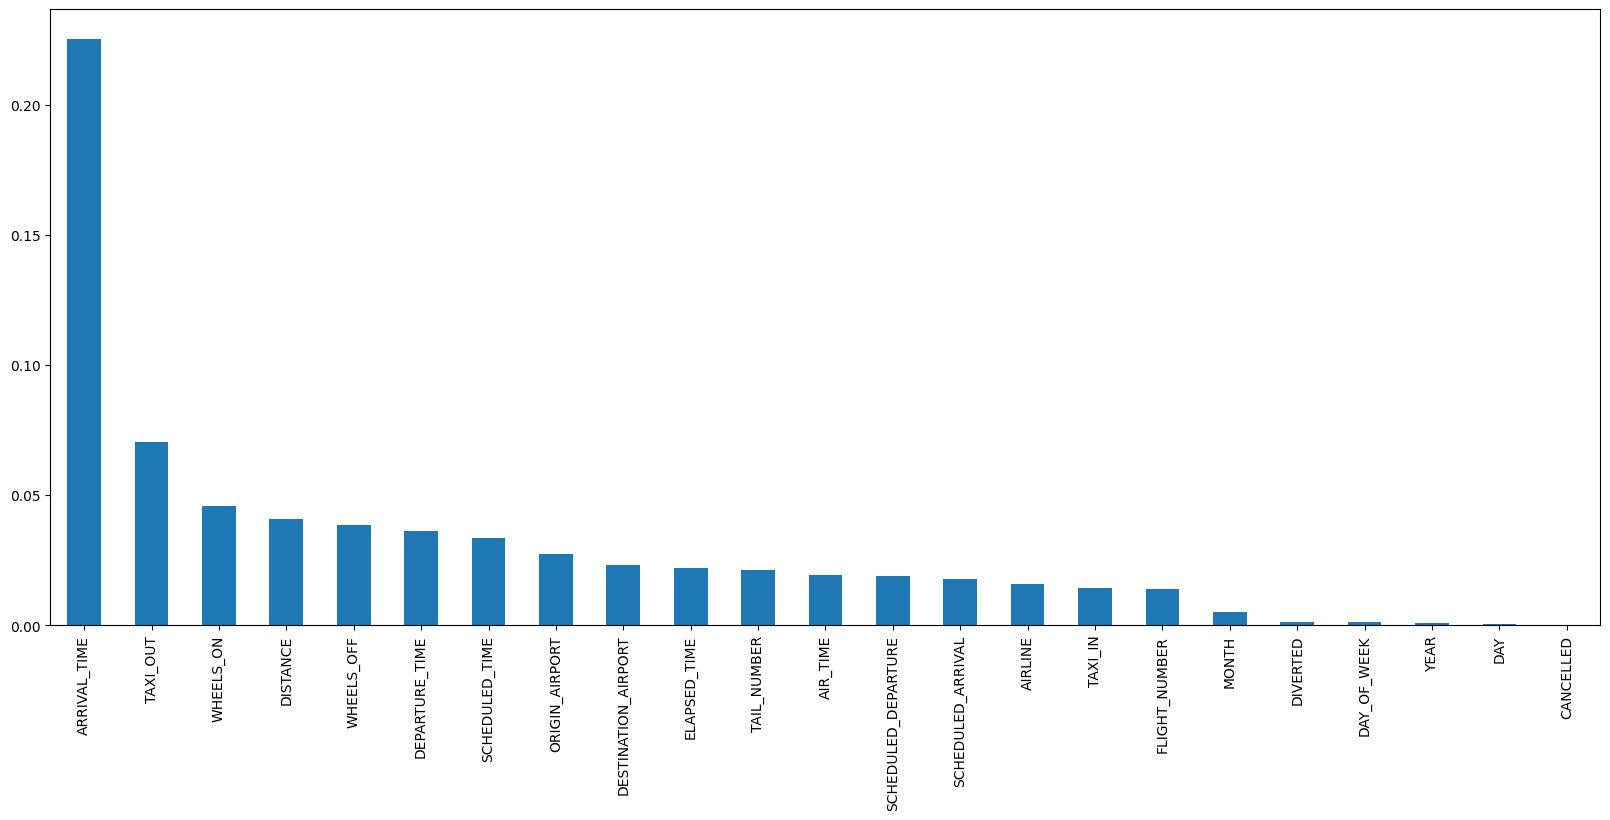

In [40]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [45]:
from sklearn.feature_selection import SelectKBest
#No we Will select the  top 18 important features
sel_eightin_cols = SelectKBest(mutual_info_regression, k=18)
sel_eightin_cols.fit(x_train, y1_train)
x_train.columns[sel_eightin_cols.get_support()]

Index(['MONTH', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
       'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME',
       'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL',
       'ARRIVAL_TIME'],
      dtype='object')

In [41]:
x_train = x_train[['MONTH', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
       'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME',
       'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL',
       'ARRIVAL_TIME']]

In [42]:
x_test = x_test[['MONTH', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
       'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME',
       'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL',
       'ARRIVAL_TIME']]

In [43]:
x_test.head(10)

,MONTH,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME
2202233,5,1,143,2610,542,324,2255,2251.0,11.0,2302.0,216.0,215.0,199.0,1542,121.0,5.0,131,126.0
4424178,10,3,1210,1159,87,245,1956,1953.0,20.0,2013.0,99.0,95.0,70.0,501,2123.0,5.0,2135,2128.0
2920646,7,2,362,2146,541,489,1210,1219.0,52.0,1311.0,165.0,192.0,134.0,1035,1525.0,6.0,1455,1531.0
121106,1,0,1009,1576,534,483,2025,2140.0,24.0,2204.0,272.0,267.0,237.0,1744,1.0,6.0,2257,7.0
362760,1,0,66,2504,591,473,1151,1149.0,12.0,1201.0,244.0,230.0,215.0,1598,1436.0,3.0,1455,1439.0
57728,1,11,425,2247,472,373,1830,1929.0,12.0,1941.0,124.0,130.0,113.0,541,2134.0,5.0,2034,2139.0
1862987,5,9,2772,4282,545,578,1700,1653.0,16.0,1709.0,96.0,87.0,65.0,455,1814.0,6.0,1836,1820.0
1537274,4,11,1831,2365,372,510,1145,1139.0,26.0,1205.0,125.0,123.0,91.0,650,1336.0,6.0,1350,1342.0
4512913,10,10,1773,978,142,101,1435,1432.0,15.0,1447.0,218.0,210.0,181.0,1400,1848.0,14.0,1913,1902.0
1011555,3,7,3572,4453,625,393,1625,1632.0,13.0,1645.0,77.0,84.0,58.0,280,1743.0,13.0,1742,1756.0


In [44]:
y1_test.head(10)

2202233    -5.0
4424178    -7.0
2920646    36.0
121106     70.0
362760    -16.0
57728      65.0
1862987   -16.0
1537274    -8.0
4512913   -11.0
1011555    14.0
Name: ARRIVAL_DELAY, dtype: float64

**Now we can check the accuracy for arrival delayed**

**After K-Best Random Forest Regressor Arrival Delayed**

In [32]:
rf_arr1 = RandomForestRegressor()
rf_arr1.fit(x_train,y1_train)

pred_rf = rf_arr1.predict(x_test)
rf_arr_r21 = r2_score(y1_test, pred_rf)
rf_arr_ma1 = mean_absolute_error(y1_test, pred_rf)
rf_arr_sq1 = mean_squared_error(y1_test, pred_rf)

print(f"accuracy = {rf_arr_r21}")
print(f"MAE = {rf_arr_ma1}")
print(f"MSE = {rf_arr_sq1}")

accuracy = 0.9502162452142286
MAE = 1.4337128819002365
MSE = 74.84357203853676


In [33]:
import pickle
with open ('RF_Arrival.pkl', 'wb') as fp:
    pickle.dump( rf_arr1, fp )

**After K-Best Decision Tree Regressor Arrival Delayed**

In [104]:
dt_arr1 = DecisionTreeRegressor()
dt_arr1.fit(x_train,y1_train)
y_pred = dt_arr1.predict(x_test)
acc_dt_arr1 = r2_score(y1_test, y_pred)
dt_arr_ma1 = mean_absolute_error(y1_test, y_pred)
dt_arr_sq1 = mean_squared_error(y1_test, y_pred)

print(f"accuracy = {acc_dt_arr1}")
print(f"MAE = {dt_arr_ma1}")
print(f"MSE = {dt_arr_sq1}")

accuracy = 0.8721882444645788
MAE = 2.702245789964167
MSE = 192.14879178862535


**After K-Best Bayesian Ridge Arrival Delayed**

In [46]:
br_arr1 = BayesianRidge()
br_arr1.fit(x_train,y1_train)
y_pred = br_arr1.predict(x_test)
acc_br_arr1 = r2_score(y1_test, y_pred)
br_arr_ma1 = mean_absolute_error(y1_test, y_pred)
br_arr_sq1 = mean_squared_error(y1_test, y_pred)

print(f"accuracy = {acc_br_arr1}")
print(f"MAE = {br_arr_ma1}")
print(f"MSE = {br_arr_sq1}")

accuracy = 0.19784801747741265
MAE = 16.64080277143291
MSE = 1205.9339426712593


**After K-Best Gradient Boosting Regressor Arrival Delayed**

In [47]:
gbr_arr1 = GradientBoostingRegressor()
gbr_arr1.fit(x_train,y1_train)
y_pred = gbr_arr1.predict(x_test)
acc_gbr_arr1 = r2_score(y1_test, y_pred)
gbr_arr_ma1 = mean_absolute_error(y1_test, y_pred)
gbr_arr_sq1 = mean_squared_error(y1_test, y_pred)

print(f"accuracy = {acc_gbr_arr1}")
print(f"MAE = {gbr_arr_ma1}")
print(f"MSE = {gbr_arr_sq1}")

accuracy = 0.7446629130388958
MAE = 11.559990992634978
MSE = 383.8669811933402


**Afte k-Best AdaBoost Regressor for Arrival Delay** 

In [46]:

from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Initialize the AdaBoost Regressor
ada_regressor = AdaBoostRegressor()
# Train the model
ada_regressor.fit(x_train, y1_train)
# Make predictions
y_pred_ada = ada_regressor.predict(x_test)
# Evaluate the model
acc_ada = r2_score(y1_test, y_pred_ada)
ada_mae = mean_absolute_error(y1_test, y_pred_ada)
ada_mse = mean_squared_error(y1_test, y_pred_ada)

print(f"AdaBoost Regressor:")
print(f"Accuracy = {acc_ada}")
print(f"MAE = {ada_mae}")
print(f"MSE = {ada_mse}")

AdaBoost Regressor:
Accuracy = -0.27283103591358504
MAE = 31.228696774848494
MSE = 1913.540305250559


**Linear Regression For Arrival Delay**

In [47]:

from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
lr_regressor = LinearRegression()
# Train the model
lr_regressor.fit(x_train, y1_train)
# Make predictions
y_pred_lr = lr_regressor.predict(x_test)
# Evaluate the model
acc_lr = r2_score(y1_test, y_pred_lr)
lr_mae = mean_absolute_error(y1_test, y_pred_lr)
lr_mse = mean_squared_error(y1_test, y_pred_lr)

print(f"Linear Regression:")
print(f"Accuracy = {acc_lr}")
print(f"MAE = {lr_mae}")
print(f"MSE = {lr_mse}")

Linear Regression:
Accuracy = 0.19784684553271759
MAE = 16.64075279357634
MSE = 1205.9357045417246


**K-Nearest Neighbors Regressor (KNN) For Arrival Delay**

In [48]:

from sklearn.neighbors import KNeighborsRegressor

# Initialize the KNN Regressor model
knn_regressor = KNeighborsRegressor()
# Train the model
knn_regressor.fit(x_train, y1_train)
# Make predictions
y_pred_knn = knn_regressor.predict(x_test)
# Evaluate the model
acc_knn = r2_score(y1_test, y_pred_knn)
knn_mae = mean_absolute_error(y1_test, y_pred_knn)
knn_mse = mean_squared_error(y1_test, y_pred_knn)

print(f"K-Nearest Neighbors Regressor:")
print(f"Accuracy = {acc_knn}")
print(f"MAE = {knn_mae}")
print(f"MSE = {knn_mse}")

K-Nearest Neighbors Regressor:
Accuracy = 0.5811127645452128
MAE = 14.835376989075128
MSE = 629.743921841434


**CatBoost Regressor For Arrival Delay**

In [49]:
# CatBoost Regressor
from catboost import CatBoostRegressor

# Initialize the CatBoost Regressor model
catboost_regressor = CatBoostRegressor(silent=True)
# Train the model
catboost_regressor.fit(x_train, y1_train)
# Make predictions
y_pred_catboost = catboost_regressor.predict(x_test)
# Evaluate the model
acc_catboost = r2_score(y1_test, y_pred_catboost)
catboost_mae = mean_absolute_error(y1_test, y_pred_catboost)
catboost_mse = mean_squared_error(y1_test, y_pred_catboost)

print(f"CatBoost Regressor:")
print(f"Accuracy = {acc_catboost}")
print(f"MAE = {catboost_mae}")
print(f"MSE = {catboost_mse}")

CatBoost Regressor:
Accuracy = 0.9771875264463269
MAE = 2.65595030840335
MSE = 34.29566562704374


**After K-Best Support Vector machine Arrival Delayed**

In [48]:
svm_arr1 = SVR()
svm_arr1.fit(x_train[:100000],y1_train[:100000])
y_pred = svm_arr1.predict(x_test[:70000])
acc_svm_arr1 = r2_score(y1_test[:70000], y_pred)
svm_arr_ma1 = mean_absolute_error(y1_test[:70000], y_pred)
svm_arr_sq1 = mean_squared_error(y1_test[:70000], y_pred)

print(f"accuracy = {acc_svm_arr1}")
print(f"MAE = {svm_arr_ma1}")
print(f"MSE = {svm_arr_sq1}")

accuracy = 0.16423110927021967
MAE = 16.804147173007046
MSE = 1286.5387344685173


***=========================================================================================================================***

### **K-Best For Departure**

In [50]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(x_train, y2_train)
mutual_info

array([0.00847297, 0.05477788, 0.03598844, 0.05852863, 0.04644461,
       0.02945146, 0.03633498, 0.75885988, 0.00357469, 0.05754793,
       0.01650608, 0.00561475, 0.00687386, 0.04289287, 0.05191982,
       0.00239132, 0.03536628, 0.05183766])

In [51]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)

DEPARTURE_TIME         0.758860
TAIL_NUMBER            0.058529
WHEELS_OFF             0.057548
AIRLINE                0.054778
WHEELS_ON              0.051920
ARRIVAL_TIME           0.051838
ORIGIN_AIRPORT         0.046445
DISTANCE               0.042893
SCHEDULED_DEPARTURE    0.036335
FLIGHT_NUMBER          0.035988
SCHEDULED_ARRIVAL      0.035366
DESTINATION_AIRPORT    0.029451
SCHEDULED_TIME         0.016506
MONTH                  0.008473
AIR_TIME               0.006874
ELAPSED_TIME           0.005615
TAXI_OUT               0.003575
TAXI_IN                0.002391
dtype: float64

<Axes: >

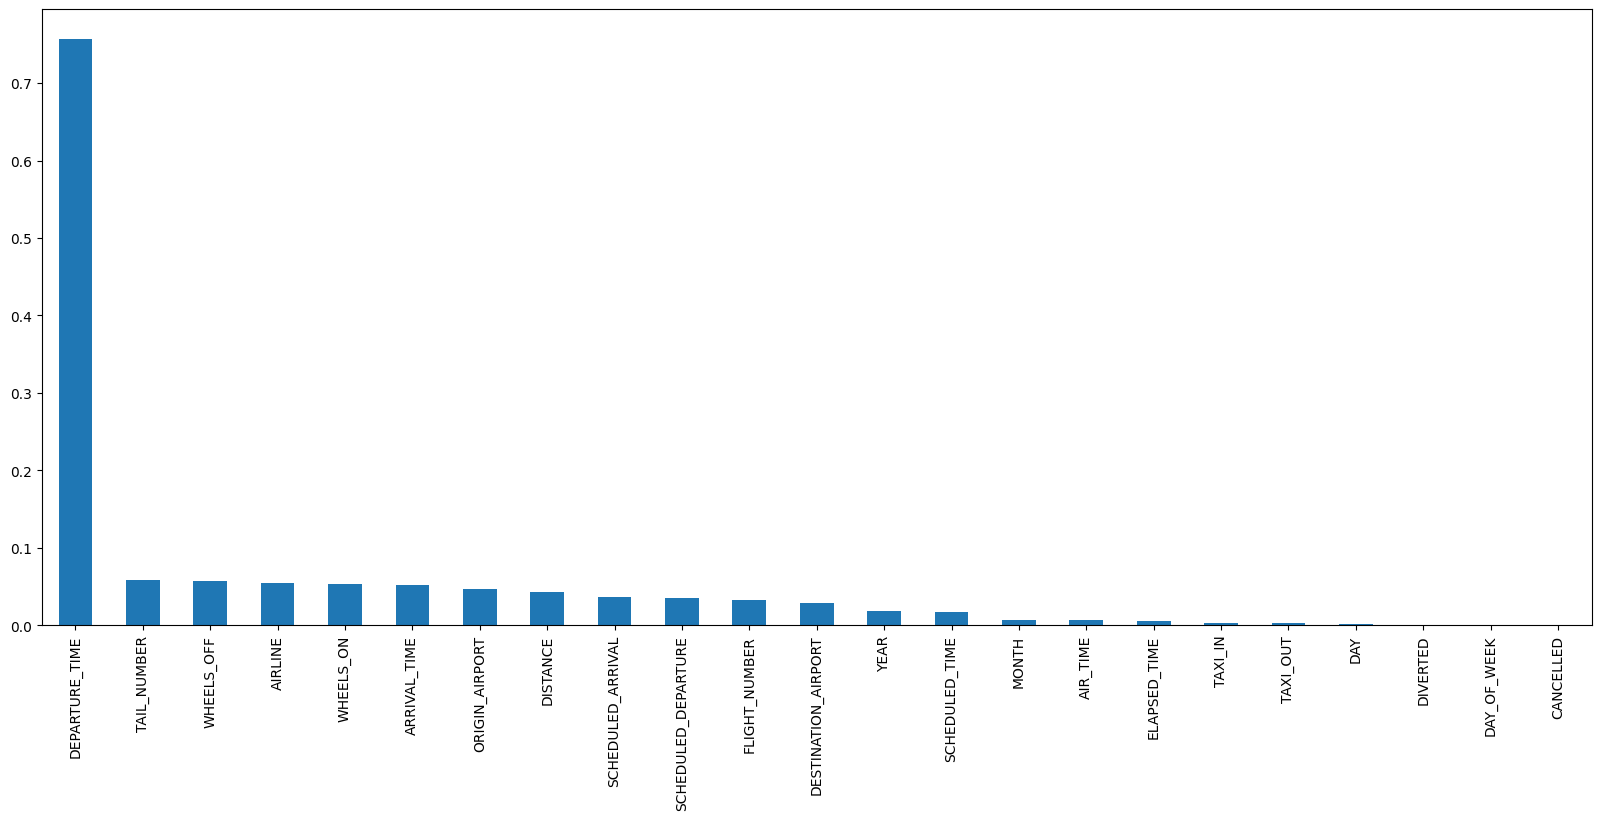

In [53]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [52]:
from sklearn.feature_selection import SelectKBest
#No we Will select the  top 814 important features
sel_14_cols = SelectKBest(mutual_info_classif, k=14)
sel_14_cols.fit(x_train, y2_train)
x_train.columns[sel_14_cols.get_support()]

Index(['AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME'],
      dtype='object')

In [53]:
x_train = x_train[['YEAR', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'DISTANCE', 'WHEELS_ON',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME']]

KeyError: "['YEAR'] not in index"

In [48]:
x_test = x_test[['YEAR', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'DISTANCE', 'WHEELS_ON',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME']]

In [51]:
x_test.head(10)

,YEAR,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,WHEELS_ON,SCHEDULED_ARRIVAL,ARRIVAL_TIME
2202233,2015,1,143,2610,542,324,2255,2251.0,2302.0,216.0,1542,121.0,131,126.0
4424178,2015,3,1210,1159,87,245,1956,1953.0,2013.0,99.0,501,2123.0,2135,2128.0
2920646,2015,2,362,2146,541,489,1210,1219.0,1311.0,165.0,1035,1525.0,1455,1531.0
121106,2015,0,1009,1576,534,483,2025,2140.0,2204.0,272.0,1744,1.0,2257,7.0
362760,2015,0,66,2504,591,473,1151,1149.0,1201.0,244.0,1598,1436.0,1455,1439.0
57728,2015,11,425,2247,472,373,1830,1929.0,1941.0,124.0,541,2134.0,2034,2139.0
1862987,2015,9,2772,4282,545,578,1700,1653.0,1709.0,96.0,455,1814.0,1836,1820.0
1537274,2015,11,1831,2365,372,510,1145,1139.0,1205.0,125.0,650,1336.0,1350,1342.0
4512913,2015,10,1773,978,142,101,1435,1432.0,1447.0,218.0,1400,1848.0,1913,1902.0
1011555,2015,7,3572,4453,625,393,1625,1632.0,1645.0,77.0,280,1743.0,1742,1756.0


In [52]:
y2_test.head(10)

2202233    -4.0
4424178    -3.0
2920646     9.0
121106     75.0
362760     -2.0
57728      59.0
1862987    -7.0
1537274    -6.0
4512913    -3.0
1011555     7.0
Name: DEPARTURE_DELAY, dtype: float64

**After K-Best Random Forest Regressor Departure Delayed**

In [49]:
rf_dep1 = RandomForestRegressor()
rf_dep1.fit(x_train,y2_train)

pred_rf = rf_dep1.predict(x_test)
rf_dep_r21 = r2_score(y2_test, pred_rf)
rf_dep_ma1 = mean_absolute_error(y2_test, pred_rf)
rf_dep_sq1 = mean_squared_error(y2_test, pred_rf)

print(f"accuracy = {rf_dep_r21}")
print(f"MAE = {rf_dep_ma1}")
print(f"MSE = {rf_dep_sq1}")

accuracy = 0.9341201102627472
MAE = 2.917735615437455
MSE = 87.64282851448847


In [50]:
import pickle
with open ('RF_Departure.pkl', 'wb') as fp:
    pickle.dump( rf_dep1, fp )

**After K-Best Decision Tree Regressor Departure Delayed**

In [60]:
from sklearn.tree import DecisionTreeRegressor

In [61]:
dt_dep1 = DecisionTreeRegressor()
dt_dep1.fit(x_train,y2_train)
y_pred = dt_dep1.predict(x_test)
acc_dt_dep1 = r2_score(y2_test, y_pred)
dt_dep_ma1 = mean_absolute_error(y2_test, y_pred)
dt_dep_sq1 = mean_squared_error(y2_test, y_pred)

print(f"accuracy = {acc_dt_dep1}")
print(f"MAE = {dt_dep_ma1}")
print(f"MSE = {dt_dep_sq1}")

accuracy = 0.8863515815600058
MAE = 3.994986021237219
MSE = 151.1913406049151


**After K-Best Bayesian Ridge Departure Delayed**

In [62]:
br_dep1 = BayesianRidge()
br_dep1.fit(x_train,y2_train)
y_pred = br_dep1.predict(x_test)
acc_br_dep1 = r2_score(y2_test, y_pred)
br_dep_ma1 = mean_absolute_error(y2_test, y_pred)
br_dep_sq1 = mean_squared_error(y2_test, y_pred)

print(f"accuracy = {acc_br_dep1}")
print(f"MAE = {br_dep_ma1}")
print(f"MSE = {br_dep_sq1}")

accuracy = 0.09026170000958811
MAE = 16.702317174563525
MSE = 1210.2636804207673


**After K-Best Gradient Boosting Regressor Departure Delayed**

In [63]:
gbr_dep1 = GradientBoostingRegressor()
gbr_dep1.fit(x_train,y2_train)
y_pred = gbr_dep1.predict(x_test)
acc_gbr_dep1 = r2_score(y2_test, y_pred)
gbr_dep_ma1 = mean_absolute_error(y2_test, y_pred)
gbr_dep_sq1 = mean_squared_error(y2_test, y_pred)

print(f"accuracy = {acc_gbr_dep1}")
print(f"MAE = {gbr_dep_ma1}")
print(f"MSE = {gbr_dep_sq1}")

accuracy = 0.8421165269508808
MAE = 8.24626183870023
MSE = 210.03912132978667


**AdaBoost Regressor for Departure delay**

In [54]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Initialize AdaBoost Regressor
ada_regressor = AdaBoostRegressor()
ada_regressor.fit(x_train, y2_train)

# Predictions
y_pred_ada = ada_regressor.predict(x_test)

# Evaluation
acc_ada = r2_score(y2_test, y_pred_ada)
ada_ma = mean_absolute_error(y2_test, y_pred_ada)
ada_mse = mean_squared_error(y2_test, y_pred_ada)

print(f"AdaBoost R2 Accuracy = {acc_ada}")
print(f"AdaBoost MAE = {ada_ma}")
print(f"AdaBoost MSE = {ada_mse}")


AdaBoost R2 Accuracy = -0.4301044281813897
AdaBoost MAE = 30.23455517872498
AdaBoost MSE = 1902.5289455825782


**After K-Best Support Vector Machine Departure Delayed**

In [64]:
svm_dep1 = SVR()
svm_dep1.fit(x_train[:100000],y2_train[:100000])
y_pred = svm_dep1.predict(x_test[:70000])
acc_svm_dep1 = r2_score(y2_test[:70000], y_pred)
svm_dep_ma1 = mean_absolute_error(y2_test[:70000], y_pred)
svm_dep_sq1 = mean_squared_error(y2_test[:70000], y_pred)

print(f"accuracy = {acc_svm_dep1}")
print(f"MAE = {svm_dep_ma1}")
print(f"MSE = {svm_dep_sq1}")

accuracy = 0.17340086034670976
MAE = 12.529838094466173
MSE = 1127.3576002111224


**Linear Regression For Departure Delay**

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Initialize Linear Regression
lr_regressor = LinearRegression()
lr_regressor.fit(x_train, y2_train)

# Predictions
y_pred_lr = lr_regressor.predict(x_test)

# Evaluation
acc_lr = r2_score(y2_test, y_pred_lr)
lr_ma = mean_absolute_error(y2_test, y_pred_lr)
lr_mse = mean_squared_error(y2_test, y_pred_lr)

print(f"Linear Regression R2 Accuracy = {acc_lr}")
print(f"Linear Regression MAE = {lr_ma}")
print(f"Linear Regression MSE = {lr_mse}")


Linear Regression R2 Accuracy = 0.09351497901175676
Linear Regression MAE = 16.64075279357635
Linear Regression MSE = 1205.9357045417241


 **K-Nearest Neighbors (KNN) Regressor for Departure Delay**

In [56]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Initialize KNN Regressor
knn_regressor = KNeighborsRegressor()
knn_regressor.fit(x_train, y2_train)

# Predictions
y_pred_knn = knn_regressor.predict(x_test)

# Evaluation
acc_knn = r2_score(y2_test, y_pred_knn)
knn_ma = mean_absolute_error(y2_test, y_pred_knn)
knn_mse = mean_squared_error(y2_test, y_pred_knn)

print(f"KNN R2 Accuracy = {acc_knn}")
print(f"KNN MAE = {knn_ma}")
print(f"KNN MSE = {knn_mse}")


KNN R2 Accuracy = 0.5994693437578453
KNN MAE = 11.454106343601927
KNN MSE = 532.8430232629364


**CatBoost Regressor for Departure Delay**

In [57]:
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Initialize CatBoost Regressor
cat_regressor = CatBoostRegressor(silent=True)
cat_regressor.fit(x_train, y2_train)

# Predictions
y_pred_cat = cat_regressor.predict(x_test)

# Evaluation
acc_cat = r2_score(y2_test, y_pred_cat)
cat_ma = mean_absolute_error(y2_test, y_pred_cat)
cat_mse = mean_squared_error(y2_test, y_pred_cat)

print(f"CatBoost R2 Accuracy = {acc_cat}")
print(f"CatBoost MAE = {cat_ma}")
print(f"CatBoost MSE = {cat_mse}")


CatBoost R2 Accuracy = 0.9769458911115313
CatBoost MAE = 2.5227456975703855
CatBoost MSE = 30.669864808894364


# **Hyper Parameter Tunning**

**Decision Tree Hyper Parameter Tunning For Arrival**

In [63]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor

dt2 = DecisionTreeRegressor()
# Define the parameter grid
param_grid = {
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Set up the GridSearchCV
grid_search = RandomizedSearchCV(estimator=dt2, param_distributions=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(x_train[:100000], y1_train[:100000])
# Get the best parameters
best_params = grid_search.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [64]:
best_params

{'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': None,
 'max_depth': 30,
 'criterion': 'friedman_mse'}

In [67]:
dt_hyp_arr = DecisionTreeRegressor(min_samples_split = 2, min_samples_leaf = 4, max_features = None, max_depth = 30, criterion = 'friedman_mse')
dt_hyp_arr.fit(x_train,y1_train)
y_pred = dt_hyp_arr.predict(x_train)
acc_dt_hyp_arr = r2_score(y1_train, y_pred)
dt_hyp_arr_ma = mean_absolute_error(y1_train, y_pred)
dt_hyp_arr_sq = mean_squared_error(y1_train, y_pred)

print(f"accuracy = {acc_dt_hyp_arr}")
print(f"MAE = {dt_hyp_arr_ma}")
print(f"MSE = {dt_hyp_arr_sq}")

accuracy = 0.9593299134674956
MAE = 1.7559009142860358
MSE = 64.48212444480122


In [68]:
y_pred = dt_hyp_arr.predict(x_test)
acc_dt_hyp_arr = r2_score(y1_test, y_pred)
dt_hyp_arr_ma = mean_absolute_error(y1_test, y_pred)
dt_hyp_arr_sq = mean_squared_error(y1_test, y_pred)

print(f"accuracy = {acc_dt_hyp_arr}")
print(f"MAE = {dt_hyp_arr_ma}")
print(f"MSE = {dt_hyp_arr_sq}")

accuracy = 0.9067091332132224
MAE = 3.046146104451568
MSE = 140.25100635618008


**Decision Tree Hyper Parameter Tunning For Departute**

In [69]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor

dt2 = DecisionTreeRegressor()
# Define the parameter grid
param_grid = {
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Set up the GridSearchCV
grid_search = RandomizedSearchCV(estimator=dt2, param_distributions=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(x_train[:100000], y2_train[:100000])
# Get the best parameters
best_params = grid_search.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [70]:
best_params

{'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': None,
 'max_depth': 50,
 'criterion': 'friedman_mse'}

In [76]:
dt_hyp_dep = DecisionTreeRegressor(min_samples_split = 5, min_samples_leaf = 1, max_features = None, max_depth = 50, criterion = 'friedman_mse')
dt_hyp_dep.fit(x_train,y1_train)
y_pred = dt_hyp_dep.predict(x_train)
acc_dt_hyp_dep = r2_score(y1_train, y_pred)
dt_hyp_dep_ma = mean_absolute_error(y1_train, y_pred)
dt_hyp_dep_sq = mean_squared_error(y1_train, y_pred)

print(f"accuracy = {acc_dt_hyp_dep}")
print(f"MAE = {dt_hyp_dep_ma}")
print(f"MSE = {dt_hyp_dep_sq}")

accuracy = 0.9881058553129151
MAE = 0.48319279341330446
MSE = 18.858079322356758


In [77]:
y_pred = dt_hyp_dep.predict(x_test)
acc_dt_hyp_dep = r2_score(y1_test, y_pred)
dt_hyp_dep_ma = mean_absolute_error(y1_test, y_pred)
dt_hyp_dep_sq = mean_squared_error(y1_test, y_pred)

print(f"accuracy = {acc_dt_hyp_dep}")
print(f"MAE = {dt_hyp_dep_ma}")
print(f"MSE = {dt_hyp_dep_sq}")

accuracy = 0.8997433168032377
MAE = 2.6909064859436973
MSE = 150.7232293640944


**Random Forest Hyper Parameter Tunning For Arrival**

In [75]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Initialize RandomForestRegressor
rf2 = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],            # Number of trees in the forest
    'max_features': ['sqrt', 'log2'],  # Number of features to consider at each split
    'max_depth': [None, 10, 20, 30],           # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],            # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],              # Minimum number of samples required to be at a leaf node
}



# Initialize GridSearchCV
grid_search = RandomizedSearchCV(estimator=rf2, param_distributions=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', 
                           n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(x_train[:100000], y1_train[:100000])
# Get the best parameters
best_params = grid_search.best_params_
best_params


Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'n_estimators': 50,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None}

In [37]:
from sklearn.ensemble import RandomForestRegressor
rf_hyp_arr = RandomForestRegressor(n_estimators = 50, min_samples_split = 5, min_samples_leaf = 1, max_features = 'sqrt', max_depth = None)
rf_hyp_arr.fit(x_train,y1_train)
y_pred = rf_hyp_arr.predict(x_train)
acc_rf_hyp_arr = r2_score(y1_train, y_pred)
rf_hyp_arr_ma = mean_absolute_error(y1_train, y_pred)
rf_hyp_arr_sq = mean_squared_error(y1_train, y_pred)

print(f"accuracy = {acc_rf_hyp_arr}")
print(f"MAE = {rf_hyp_arr_ma}")
print(f"MSE = {rf_hyp_arr_sq}")

accuracy = 0.9755005907963067
MAE = 2.7898069239636314
MSE = 38.843633928196105


In [38]:
y_pred = rf_hyp_arr.predict(x_test)
acc_rf_hyp_arr = r2_score(y1_test, y_pred)
rf_hyp_arr_ma = mean_absolute_error(y1_test, y_pred)
rf_hyp_arr_sq = mean_squared_error(y1_test, y_pred)

print(f"accuracy = {acc_rf_hyp_arr}")
print(f"MAE = {rf_hyp_arr_ma}")
print(f"MSE = {rf_hyp_arr_sq}")

accuracy = 0.9170611730195092
MAE = 5.783575352693173
MSE = 124.68802521259909


**Random Forest Hyper Parameter Tunning For Departute**

In [74]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Initialize RandomForestRegressor
rf2 = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],            # Number of trees in the forest
    'max_features': ['sqrt', 'log2'],  # Number of features to consider at each split
    'max_depth': [None, 10, 20, 30],           # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],            # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],              # Minimum number of samples required to be at a leaf node
}



# Initialize GridSearchCV
grid_search = RandomizedSearchCV(estimator=rf2, param_distributions=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', 
                           n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(x_train[:100000], y2_train[:100000])
# Get the best parameters
best_params = grid_search.best_params_
best_params


Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'n_estimators': 50,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 30}

In [39]:
from sklearn.ensemble import RandomForestRegressor
rf_hyp_dep = RandomForestRegressor(n_estimators = 50, min_samples_split = 5, min_samples_leaf = 1, max_features = 'sqrt', max_depth = None)
rf_hyp_dep.fit(x_train,y1_train)
y_pred = rf_hyp_dep.predict(x_train)
acc_rf_hyp_dep = r2_score(y1_train, y_pred)
rf_hyp_dep_ma = mean_absolute_error(y1_train, y_pred)
rf_hyp_dep_sq = mean_squared_error(y1_train, y_pred)

print(f"accuracy = {acc_rf_hyp_dep}")
print(f"MAE = {rf_hyp_dep_ma}")
print(f"MSE = {rf_hyp_dep_sq}")

accuracy = 0.9752518047330931
MAE = 2.7497301534726253
MSE = 39.23808241001692


In [40]:
y_pred = rf_hyp_dep.predict(x_test)
acc_rf_hyp_dep = r2_score(y1_test, y_pred)
rf_hyp_dep_ma = mean_absolute_error(y1_test, y_pred)
rf_hyp_dep_sq = mean_squared_error(y1_test, y_pred)

print(f"accuracy = {acc_rf_hyp_dep}")
print(f"MAE = {rf_hyp_dep_ma}")
print(f"MSE = {rf_hyp_dep_sq}")

accuracy = 0.9201805081616338
MAE = 5.696141491558262
MSE = 119.99849977550471


**Hyper Parameter Tunning Support vector Machine Arrival**

In [42]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# Define the SVR model
svr_hyp = SVR()

# Define the parameter grid for tuning
param_grid = { 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  'C': [0.1, 1, 10, 100],  'epsilon': [0.1, 0.2, 0.5, 1.0] }

# Initialize GridSearchCV
grid_search = RandomizedSearchCV(estimator=svr_hyp, param_distributions=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(x_train[:10000], y1_train[:10000])

# Get the best parameters and best score
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'kernel': 'poly', 'epsilon': 0.1, 'C': 100}


In [44]:
# Best Parameters: {'kernel': 'poly', 'epsilon': 0.1, 'C': 100}

In [30]:
svm_hyp = SVR(kernel = 'poly', epsilon = 0.1, C = 100)
svm_hyp.fit(x_train[:100000],y1_train[:100000])
y_pred = svm_hyp.predict(x_train[:70000])
acc_svm_hyp_arr = r2_score(y1_train[:70000], y_pred)
svm_hyp_arr_ma = mean_absolute_error(y1_train[:70000], y_pred)
svm_hyp_arr_sq = mean_squared_error(y1_train[:70000], y_pred)

print(f"accuracy = {acc_svm_hyp_arr}")
print(f"MAE = {svm_hyp_arr_ma}")
print(f"MSE = {svm_hyp_arr_sq}")

accuracy = 0.8185487574758918
MAE = 5.553905505954273
MSE = 273.0560337814417


In [31]:
svm_hyp = SVR()
svm_hyp.fit(x_train[:100000],y1_train[:100000])
y_pred = svm_hyp.predict(x_test[:70000])
acc_svm_hyp_arr = r2_score(y1_test[:70000], y_pred)
svm_hyp_arr_ma = mean_absolute_error(y1_test[:70000], y_pred)
svm_hyp_arr_sq = mean_squared_error(y1_test[:70000], y_pred)

print(f"accuracy = {acc_svm_hyp_arr}")
print(f"MAE = {svm_hyp_arr_ma}")
print(f"MSE = {svm_hyp_arr_sq}")

accuracy = 0.13253599822792328
MAE = 17.175765065551825
MSE = 1335.328523729026


**Hyper Parameter Tunning Support vector Machine Departure**

In [43]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# Define the SVR model
svr_hyp = SVR()

# Define the parameter grid for tuning
param_grid = { 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  'C': [0.1, 1, 10, 100],  'epsilon': [0.1, 0.2, 0.5, 1.0] }

# Initialize GridSearchCV
grid_search = RandomizedSearchCV(estimator=svr_hyp, param_distributions=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(x_train[:10000], y2_train[:10000])

# Get the best parameters and best score
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'kernel': 'rbf', 'epsilon': 1.0, 'C': 100}


In [45]:
# Best Parameters: {'kernel': 'poly', 'epsilon': 0.1, 'C': 100}

In [32]:
svm_hyp = SVR( kernel = 'rbf', epsilon = 1.0, C = 100 )
svm_hyp.fit(x_train[:100000],y2_train[:100000])
y_pred = svm_hyp.predict(x_train[:70000])
acc_svm_hyp_dep = r2_score(y2_train[:70000], y_pred)
svm_hyp_dep_ma = mean_absolute_error(y2_train[:70000], y_pred)
svm_hyp_dep_sq = mean_squared_error(y2_train[:70000], y_pred)

print(f"accuracy = {acc_svm_hyp_dep}")
print(f"MAE = {svm_hyp_dep_ma}")
print(f"MSE = {svm_hyp_dep_sq}")

accuracy = 0.7920231170312266
MAE = 5.193682940028686
MSE = 276.09288143182334


In [33]:
svm_hyp = SVR()
svm_hyp.fit(x_train[:100000],y2_train[:100000])
y_pred = svm_hyp.predict(x_test[:70000])
acc_svm_hyp_arr = r2_score(y2_test[:70000], y_pred)
svm_hyp_arr_ma = mean_absolute_error(y2_test[:70000], y_pred)
svm_hyp_arr_sq = mean_squared_error(y2_test[:70000], y_pred)

print(f"accuracy = {acc_svm_hyp_arr}")
print(f"MAE = {svm_hyp_arr_ma}")
print(f"MSE = {svm_hyp_arr_sq}")

accuracy = 0.10598285861532009
MAE = 13.080340734949308
MSE = 1219.3056715275384


**Hyper Parameter Tunning Gradient Boosting Regressor Arrival**

In [32]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
# Initialize the Gradient Boosting Regressor
gbr1 = GradientBoostingRegressor()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = RandomizedSearchCV(estimator=gbr1, param_distributions=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(x_train[:100000], y1_train[:100000])

# Print the best parameters and the best score
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'n_estimators': 150, 'min_samples_split': 10, 'max_depth': 7, 'learning_rate': 0.1}


In [34]:
gbr_hyp = GradientBoostingRegressor(n_estimators = 150, min_samples_split = 10, max_depth = 7, learning_rate = 0.1)
gbr_hyp.fit(x_train,y1_train)
y_pred = gbr_hyp.predict(x_train)
acc_gbr_hyp_arr = r2_score(y1_train, y_pred)
gbr_hyp_arr_ma = mean_absolute_error(y1_train, y_pred)
gbr_hyp_arr_sq = mean_squared_error(y1_train, y_pred)

print(f"accuracy = {acc_gbr_hyp_arr}")
print(f"MAE = {gbr_hyp_arr_ma}")
print(f"MSE = {gbr_hyp_arr_sq}")

accuracy = 0.9769571919754915
MAE = 3.762078558117119
MSE = 36.53420342261874


In [36]:
gbr_hyp = GradientBoostingRegressor(n_estimators = 150, min_samples_split = 10, max_depth = 7, learning_rate = 0.1)
gbr_hyp.fit(x_train,y1_train)
y_pred = gbr_hyp.predict(x_test)
acc_gbr_hyp_arr = r2_score(y1_test, y_pred)
gbr_hyp_arr_ma = mean_absolute_error(y1_test, y_pred)
gbr_hyp_arr_sq = mean_squared_error(y1_test, y_pred)

print(f"accuracy = {acc_gbr_hyp_arr}")
print(f"MAE = {gbr_hyp_arr_ma}")
print(f"MSE = {gbr_hyp_arr_sq}")

accuracy = 0.9579322584885851
MAE = 4.044443872317378
MSE = 63.24352302988599


**Hyper Parameter Tunning Gradient Boosting Regressor Departure**

In [33]:
# Initialize the Gradient Boosting Regressor
gbr1 = GradientBoostingRegressor()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = RandomizedSearchCV(estimator=gbr1, param_distributions=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(x_train, y2_train)

# Print the best parameters and the best score
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'n_estimators': 150, 'min_samples_split': 5, 'max_depth': 7, 'learning_rate': 0.2}


In [ ]:
# Parameters: {'n_estimators': 150, 'min_samples_split': 5, 'max_depth': 7, 'learning_rate': 0.2}

In [37]:
gbr_hyp_dep = GradientBoostingRegressor(n_estimators = 150, min_samples_split = 5, max_depth = 7, learning_rate = 0.2)
gbr_hyp_dep.fit(x_train,y2_train)
y_pred = gbr_hyp_dep.predict(x_train)
acc_gbr_hyp_dep = r2_score(y2_train, y_pred)
gbr_hyp_dep_ma = mean_absolute_error(y2_train, y_pred)
gbr_hyp_dep_sq = mean_squared_error(y2_train, y_pred)

print(f"accuracy = {acc_gbr_hyp_dep}")
print(f"MAE = {gbr_hyp_dep_ma}")
print(f"MSE = {gbr_hyp_dep_sq}")

accuracy = 0.9921270599849448
MAE = 2.1405856611009173
MSE = 11.037940955736849


In [38]:
gbr_hyp_dep = GradientBoostingRegressor(n_estimators = 150, min_samples_split = 5, max_depth = 7, learning_rate = 0.2)
gbr_hyp_dep.fit(x_train,y2_train)
y_pred = gbr_hyp_dep.predict(x_test)
acc_gbr_hyp_dep = r2_score(y2_test, y_pred)
gbr_hyp_dep_ma = mean_absolute_error(y2_test, y_pred)
gbr_hyp_dep_sq = mean_squared_error(y2_test, y_pred)

print(f"accuracy = {acc_gbr_hyp_dep}")
print(f"MAE = {gbr_hyp_dep_ma}")
print(f"MSE = {gbr_hyp_dep_sq}")

accuracy = 0.974182804399714
MAE = 2.4583963145984558
MSE = 34.34571696681812


**Hyper parameter tunning for Bayesian Ridge Arrival**

In [39]:
# Initialize the BayesianRidge model
br1 = BayesianRidge()

# Define the hyperparameters grid
param_grid = {
    'alpha_1': np.logspace(-10, 10, 5),
    'alpha_2': np.logspace(-10, 10, 5),
    'lambda_1': np.logspace(-10, 10, 5),
    'lambda_2': np.logspace(-10, 10, 5)
}

# Initialize GridSearchCV
grid_search = RandomizedSearchCV(estimator=br1,
                           param_distributions=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=5,  # Number of cross-validation folds
                           n_jobs=-1)  # Use all available cores

# Fit GridSearchCV
grid_search.fit(x_train[:100000], y1_train[:100000])

# Get the best parameters and the best model
best_params = grid_search.best_params_
print(best_params)

{'lambda_2': 1e-05, 'lambda_1': 1e-10, 'alpha_2': 1e-05, 'alpha_1': 1.0}


In [41]:
br_hyp_arr = BayesianRidge( lambda_2 = 1e-05, lambda_1 = 1e-10, alpha_2 = 1e-05, alpha_1 = 1.0 )
br_hyp_arr.fit(x_train,y1_train)
y_pred = br_hyp_arr.predict(x_train)
acc_br_hyp_arr= r2_score(y1_train, y_pred)
br_hyp_arr_ma = mean_absolute_error(y1_train, y_pred)
br_hyp_arr_sq = mean_squared_error(y1_train, y_pred)

print(f"accuracy = {acc_br_hyp_arr}")
print(f"MAE = {br_hyp_arr_ma}")
print(f"MSE = {br_hyp_arr_sq}")

accuracy = 0.19409361996169305
MAE = 16.71007188307508
MSE = 1277.7586653757567


In [43]:
br_hyp_arr = BayesianRidge( lambda_2 = 1e-05, lambda_1 = 1e-10, alpha_2 = 1e-05, alpha_1 = 1.0 )
br_hyp_arr.fit(x_train,y1_train)
y_pred = br_hyp_arr.predict(x_test)
acc_br_hyp_arr = r2_score(y1_test, y_pred)
br_hyp_arr_ma = mean_absolute_error(y1_test, y_pred)
br_hyp_arr_sq = mean_squared_error(y1_test, y_pred)

print(f"accuracy = {acc_br_hyp_arr}")
print(f"MAE = {br_hyp_arr_ma}")
print(f"MSE = {br_hyp_arr_sq}")

accuracy = 0.19788756279455
MAE = 16.641180252627283
MSE = 1205.8744912939035


**Hyper parameter tunning for Bayesian Ridge Departure**

In [40]:
# Initialize the BayesianRidge model
br1 = BayesianRidge()

# Define the hyperparameters grid
param_grid = {
    'alpha_1': np.logspace(-10, 10, 5),
    'alpha_2': np.logspace(-10, 10, 5),
    'lambda_1': np.logspace(-10, 10, 5),
    'lambda_2': np.logspace(-10, 10, 5)
}

# Initialize GridSearchCV
grid_search = RandomizedSearchCV(estimator=br1,
                           param_distributions=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=5,  # Number of cross-validation folds
                           n_jobs=-1)  # Use all available cores

# Fit GridSearchCV
grid_search.fit(x_train[:100000], y2_train[:100000])

# Get the best parameters and the best model
best_params = grid_search.best_params_
print(best_params)

{'lambda_2': 10000000000.0, 'lambda_1': 10000000000.0, 'alpha_2': 100000.0, 'alpha_1': 100000.0}


In [45]:
br_hyp_dep = BayesianRidge( lambda_2 = 10000000000.0, lambda_1 = 10000000000.0, alpha_2 = 100000.0, alpha_1 = 100000.0 )
br_hyp_dep.fit(x_train,y2_train)
y_pred = br_hyp_dep.predict(x_train)
acc_br_hyp_dep= r2_score(y2_train, y_pred)
br_hyp_dep_ma = mean_absolute_error(y2_train, y_pred)
br_hyp_dep_sq = mean_squared_error(y2_train, y_pred)

print(f"accuracy = {acc_br_hyp_dep}")
print(f"MAE = {br_hyp_dep_ma}")
print(f"MSE = {br_hyp_dep_sq}")

accuracy = 0.08862377182852965
MAE = 16.71002030622958
MSE = 1277.7586233074255


In [46]:
br_hyp_arr = BayesianRidge( lambda_2 = 10000000000.0, lambda_1 = 10000000000.0, alpha_2 = 100000.0, alpha_1 = 100000.0 )
br_hyp_arr.fit(x_train,y2_train)
y_pred = br_hyp_arr.predict(x_test)
acc_br_hyp_dep = r2_score(y2_test, y_pred)
br_hyp_dep_ma = mean_absolute_error(y2_test, y_pred)
br_hyp_dep_sq = mean_squared_error(y2_test, y_pred)

print(f"accuracy = {acc_br_hyp_dep}")
print(f"MAE = {br_hyp_dep_ma}")
print(f"MSE = {br_hyp_dep_sq}")

accuracy = 0.09355951275725827
MAE = 16.641138949615605
MSE = 1205.8764593997596


###
**-----------------------------------------------------------------------------------------------------END---------------------------------------------------------------------------------------------------------------------**